#  Мониторинг процесса обучения

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
* https://docs.wandb.ai/quickstart
* https://docs.wandb.ai/guides/track/log/log-summary#docusaurus_skipToContent_fallback
* https://docs.wandb.ai/guides/track/log/log-models
* https://www.youtube.com/playlist?list=PLD80i8An1OEGajeVo15ohAQYF1Ttle0lk

## Задачи для совместного разбора

In [ ]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.5/314.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import wandb

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

1\. Рассмотрите возможности пакета `wandb` по отслеживанию числовых значений, визуализации изображений и таблиц.

In [ ]:
import torch as th
def train(num_epochs: int):
  for x in range(num_epochs):
    x = th.tensor(x)
    loss = th.exp(-x/num_epochs)
    r2 = th.randn(size=(1,))
    wandb.log({"train/loss": loss, "train/r2": r2})
  wandb.run.summary["test/r2"] = 1

In [ ]:
with wandb.init(
    project="seminar-tutorial",
    # name="run2",
    tags=["demo"],
    config={"num_epochs": 100}
):
  train(100)

wandb: Currently logged in as: dyakandr (9kefir). Use `wandb login --relogin` to force relogin


train/loss,██▇▇▇▇▇▇▇▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
train/r2,▄▇▆▇▅▆▅▅▂▆▄▅▆▄▅▅▃█▅▅▅▄▃▅▅▃▂▄▆▅▆▃▄▁▅▃▃▄▃▆
test/r2,1
train/loss,0.37158
train/r2,-0.14347


In [ ]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

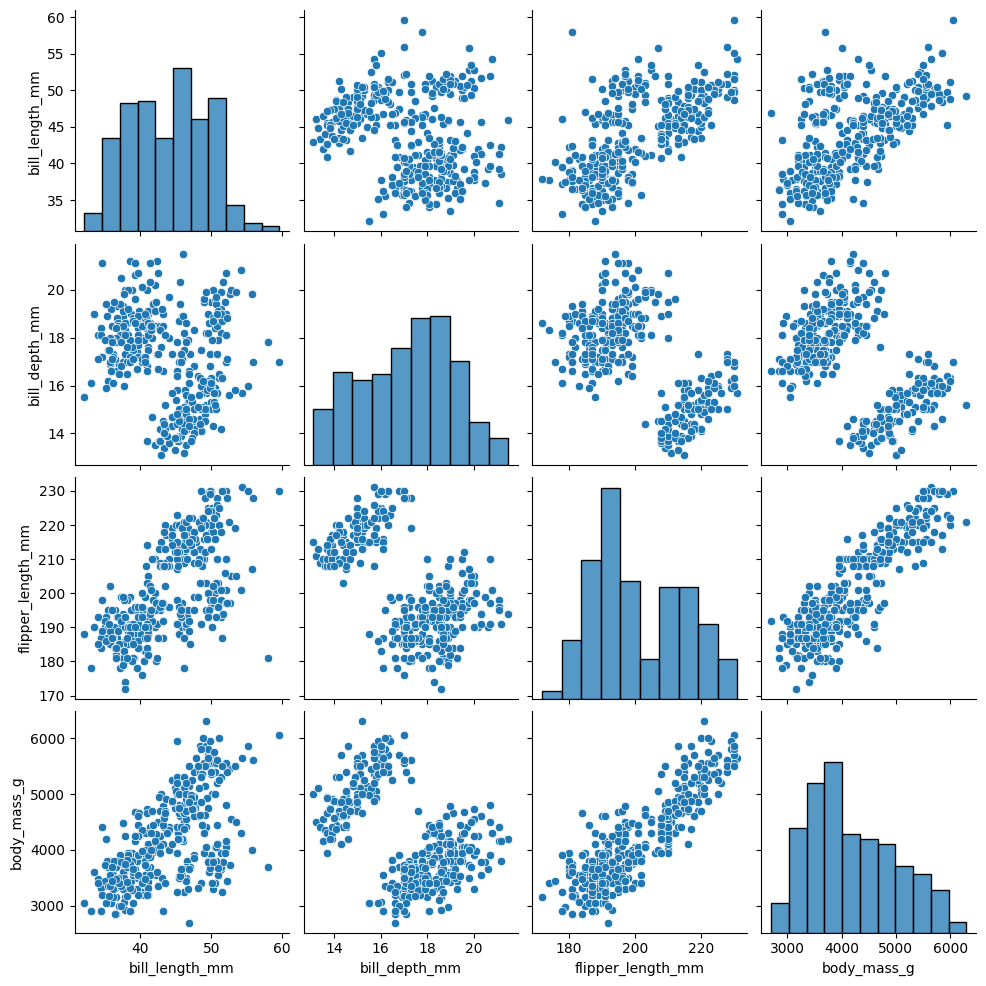

In [ ]:
with wandb.init(
    project="seminar-tutorial",
    # name="run2",
    tags=["demo"],
    config={"num_epochs": 100}
):
  dataset = sns.load_dataset("penguins")
  img = sns.pairplot(dataset)
  wandb.log({"train/pairplot": wandb.Image(img.figure)})

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Решите задачу регрессии, используя для мониторинга процесса обучения `wandb`.

Разделите набор данных на обучающее и тестовое множество. В процессе обучения отслеживайте динамику изменения значения функции потерь и метрики $R^2$ по эпохам. После завершения обучения рассчитайте значение метрик MSE, RMSE, MAE и MAPE и сохраните в виде summary данного запуска.

Обучите не менее трех моделей (с разной архитектурой или гиперпараметрами), отследите все запуски при помощи `wandb` и вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс `wandb` с графиками обучения. Для каждого запуска приложите также скриншот с описанием гиперпараметров модели и summary (страница overview).

- [ ] Проверено на семинаре

In [ ]:
import torch as th

X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

In [ ]:
from sklearn.model_selection import train_test_split
from torch import nn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)
X_train.shape, y_test.shape

(torch.Size([80, 1]), torch.Size([20, 1]))

In [ ]:
model_1 = nn.Sequential(nn.Linear(1,10), nn.Tanh(), nn.Linear(10, 1))
model_2 = nn.Sequential(nn.Linear(1,7), nn.Sigmoid(), nn.Linear(7, 1))
model_3 = nn.Sequential(nn.Linear(1,10), nn.ReLU(), nn.Linear(10, 3), nn.Linear(3, 1))

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

def r2_score(y_true, y_pred):
    ss_res = th.sum((y_true - y_pred) ** 2)
    ss_tot = th.sum((y_true - th.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2.item()

def compute_metrics_reg1(y_true, y_pred):
    mse = nn.MSELoss()(y_pred, y_true).item()
    rmse = th.sqrt(th.tensor(mse))
    mae = nn.L1Loss()(y_pred, y_true).item()
    mape = th.mean(th.abs((y_true - y_pred) / y_true)).item() * 100
    return mse, rmse, mae, mape

def train_reg1(num_epochs: int, criterion, model, lr=0.1):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        for x_batch, y_batch in loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            r2 = r2_score(y_batch, y_pred)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()

            wandb.log({"train/loss": loss.item(), "train/r2": r2})


        model.eval()
        with th.no_grad():
            y_test_pred = model(X_test)
            test_r2 = r2_score(y_test, y_test_pred)
            wandb.log({"test/r2": test_r2})

    model.eval()
    with th.no_grad():
        y_test_pred = model(X_test)
        mse, rmse, mae, mape = compute_metrics_reg1(y_test, y_test_pred)


    wandb.run.summary["test/MSE"] = mse
    wandb.run.summary["test/RMSE"] = rmse
    wandb.run.summary["test/MAE"] = mae
    wandb.run.summary["test/MAPE"] = mape
    wandb.run.summary["test/r2"] = r2_score(y_test, y_test_pred)

In [ ]:
criterion = nn.MSELoss()
models = [model_1, model_2, model_3]
for model in models:
    with wandb.init(
        project="Homework",
        # name="run2",
        tags=["regression_1"],
        config={"num_epochs": 150, "lr": 0.01, "criterion": "MSELoss"},
    ):
        train_dataset = TensorDataset(X_train, y_train)
        loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

        train_reg1(150, criterion, model, lr=0.01)

test/r2,▁▁▁▂▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇████████████████████
train/loss,███▆▆▇▇▇▃▅▃▃▄▅▄▅▃▄▃▄▄▃▂▂▄▂▁▄▁▂▃▂▂▁▃▂▂▂▂▄
train/r2,▁▂▂▁▂▃▄▅▄▅▅▄▅▅▆▅▆▆▆▆▄▇▅▇▆▆▇▇▇▆▆▇▆▆▇█▇█▇▆
test/MAE,0.36551
test/MAPE,82.79179
test/MSE,0.1658
test/RMSE,0.40719
test/r2,0.6691
train/loss,0.20763
train/r2,0.60198


test/r2,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇█
train/loss,▅▅▅█▅▅▄▇▆▆▆█▅▅█▆▄▅▅▅▆▆▄▃▆▅▁▆▄▃▅▅▄▃▅▅▃▃▆▃
train/r2,▄▆▄▆▇▇▆▆▇▁▇▇▇▇▇▅▇▇▇▇▇▆▆▇▇█▆▇▇▇█▇█▆████▇█
test/MAE,0.52585
test/MAPE,75.88196
test/MSE,0.34609
test/RMSE,0.58829
test/r2,0.3093
train/loss,0.34407
train/r2,0.18932


test/r2,▁▁▂▂▂▂▂▂▃▃▄▄▄▅▅▆▆▆▆▇▇▇▇▇▇███████████████
train/loss,▅█▃▇▇▆▂▅▅▄▆▅▅▂▄▃▄▃▄▃▁▃▃▃▂▂▄▃▃▃▃▃▂▂▃▂▁▂▂▃
train/r2,▂▁▂▂▂▂▃▂▃▃▃▃▄▅▅▆▄▄▆▅▆▆▆▇▆▄▇▆▆▆▇▅▇▆▇▅██▇▇
test/MAE,0.35971
test/MAPE,82.23683
test/MSE,0.16024
test/RMSE,0.40031
test/r2,0.68019
train/loss,0.27714
train/r2,0.52121


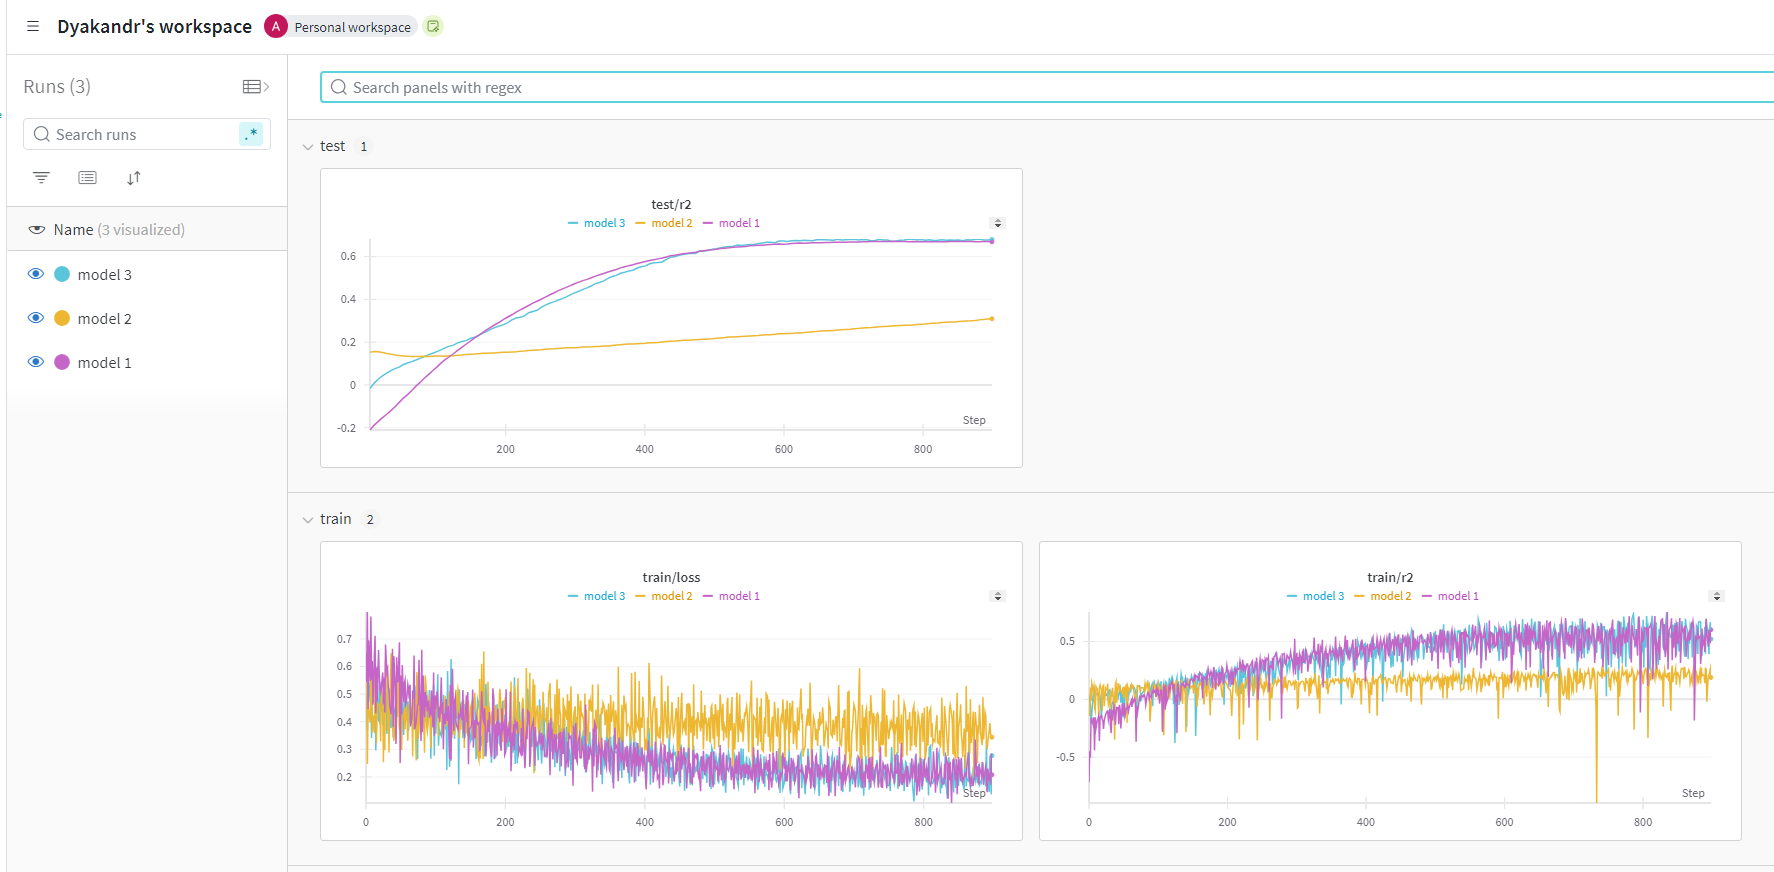

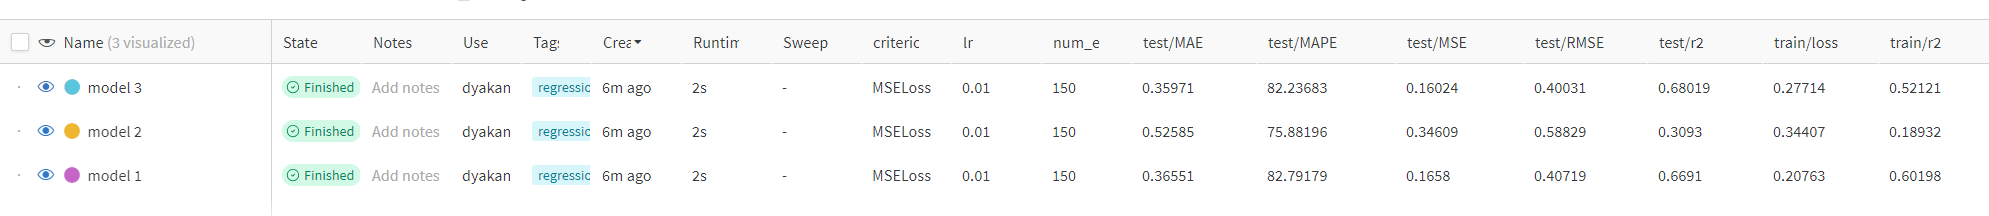

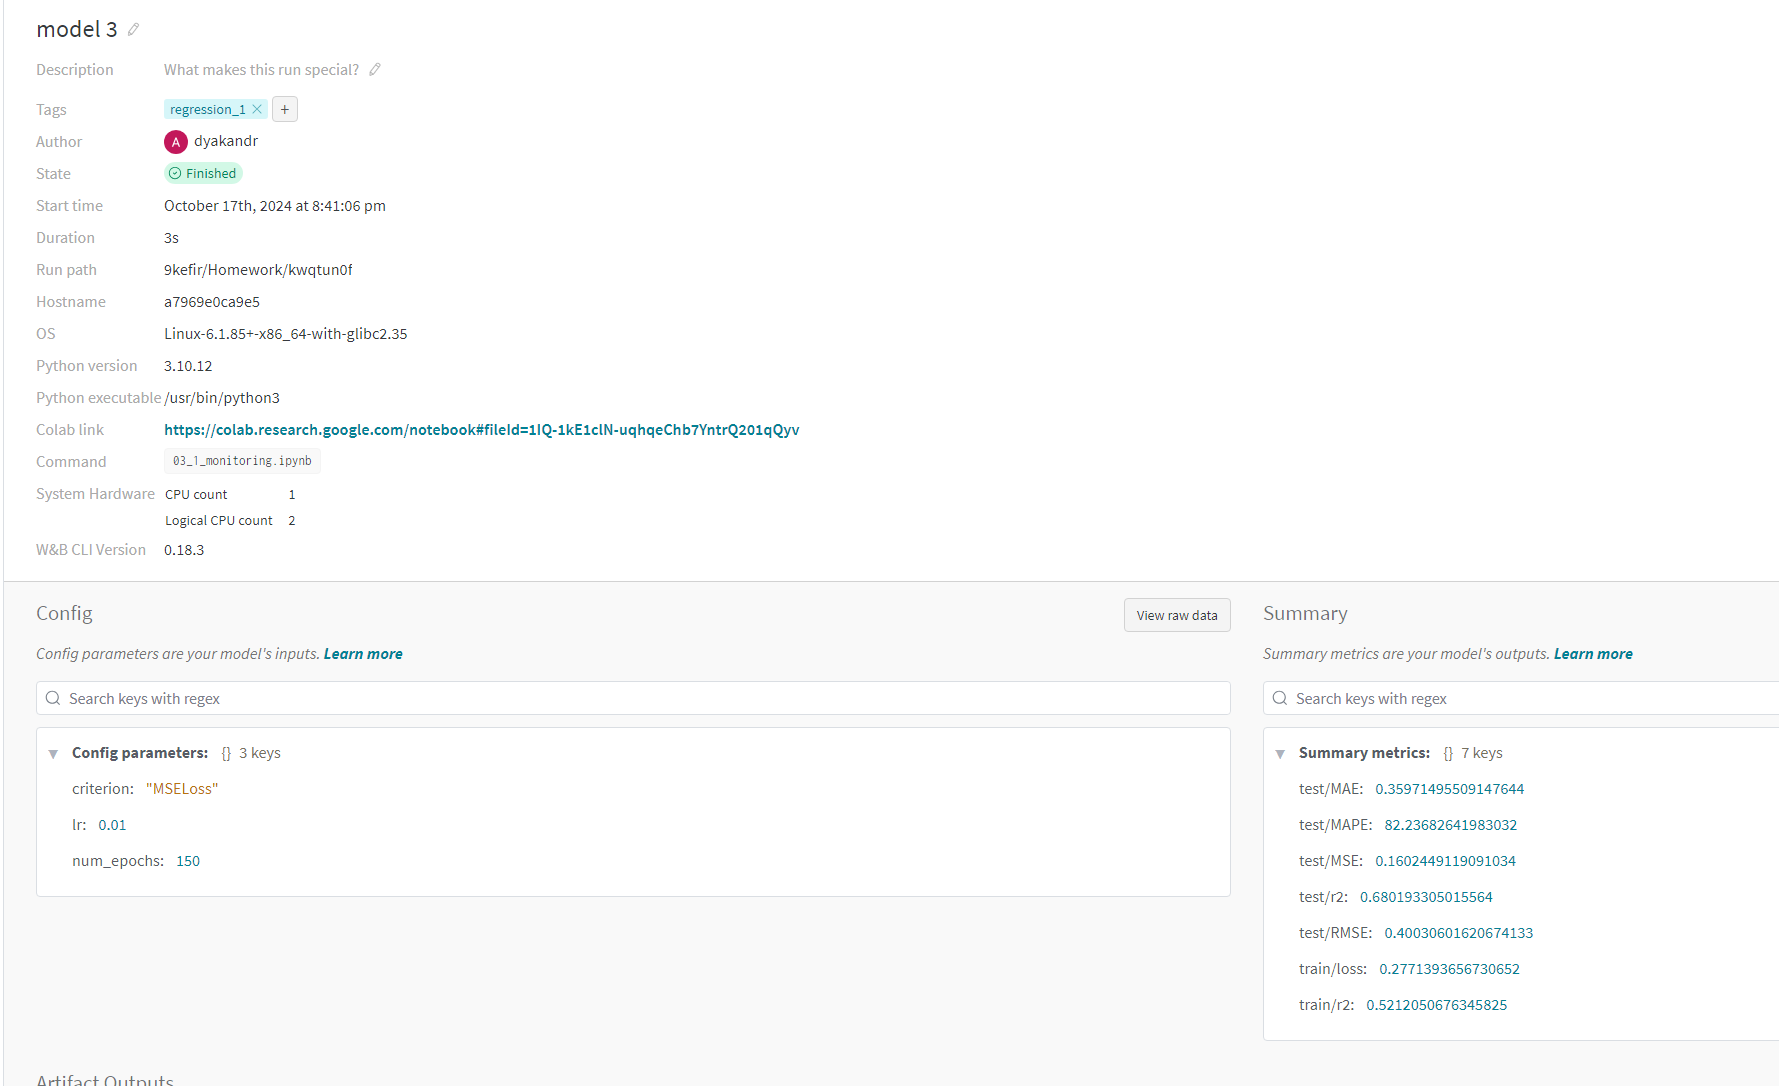

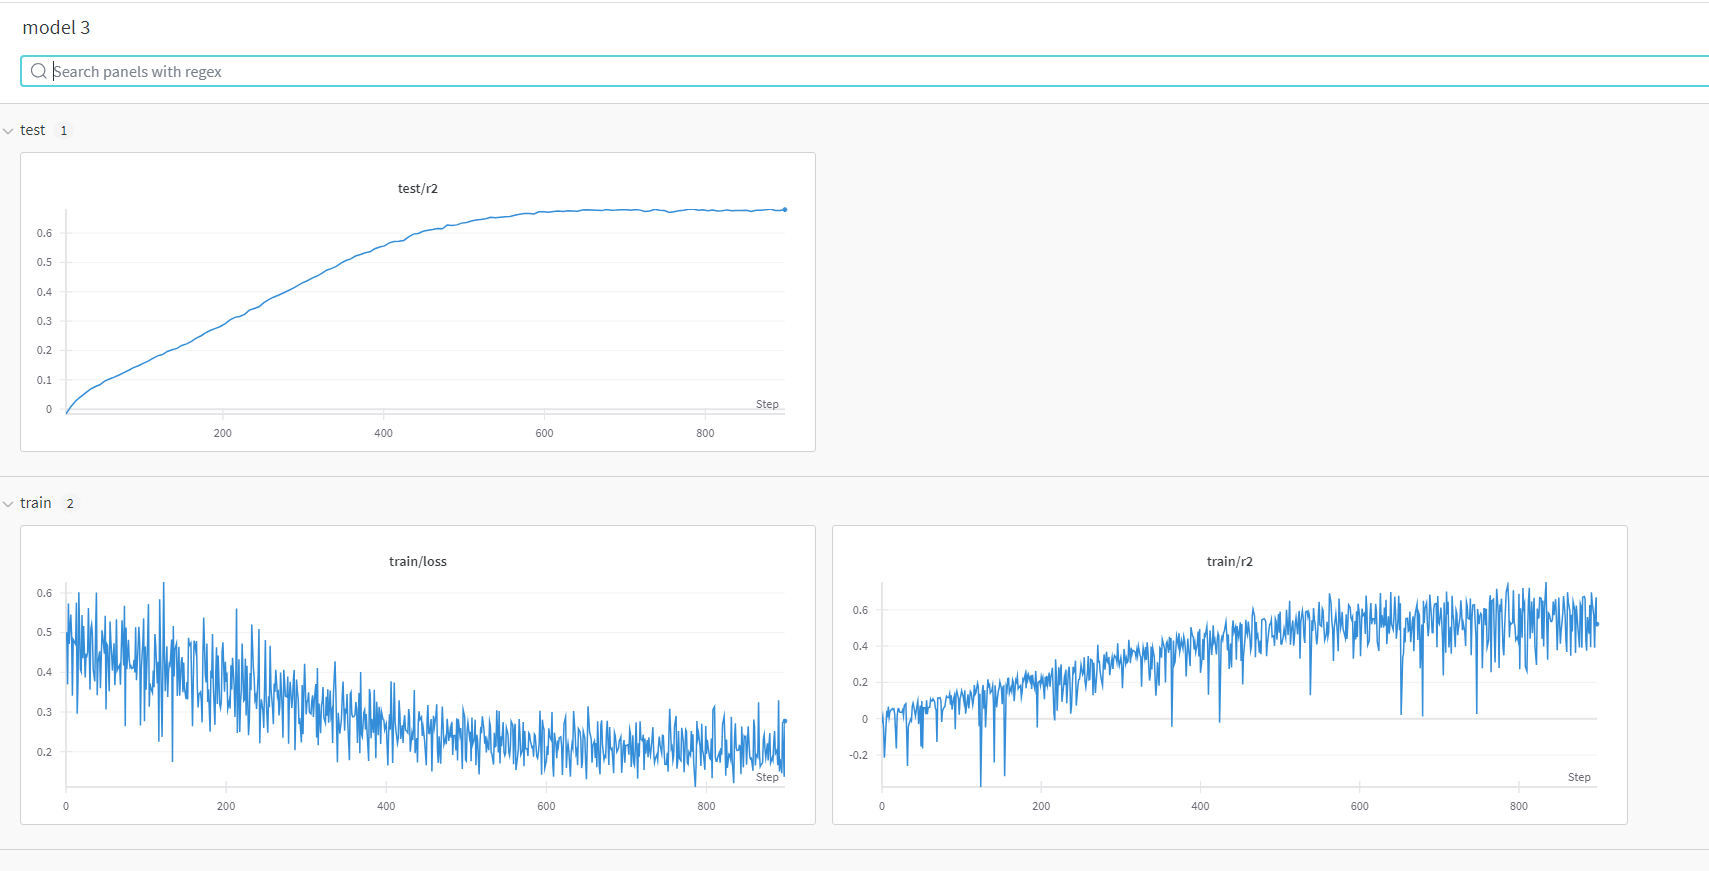

<p class="task" id="2"></p>

2\. Решите задачу классификации, используя для мониторинга процесса обучения `wandb`.

Разделите набор данных на обучающее и тестовое множество. В процессе обучения отслеживайте динамику изменения значения функции потерь и метрики `Accuracy` по эпохам. После завершения обучения рассчитайте значение метрик Accuracy, Precision, Recall и F1 и сохраните в виде summary данного запуска.

Отследите все запуски при помощи `wandb` и вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс `wandb` с графиками обучения. Для каждого запуска приложите также скриншот с описанием гиперпараметров модели и summary (страница overview).


- [ ] Проверено на семинаре

In [ ]:
pip install torchmetrics

In [ ]:
import torch as th
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

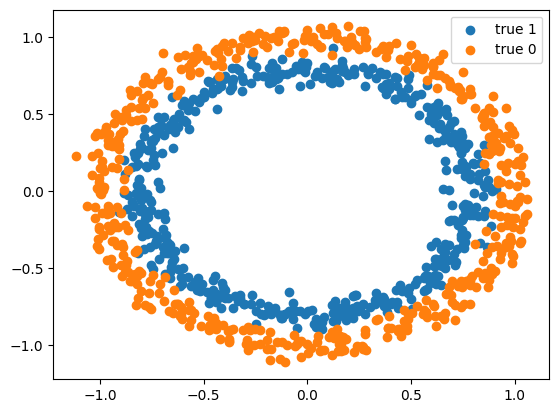

In [ ]:
import  matplotlib.pyplot as plt

x_1_0 = X[y==1][:,0]
X_1_1 = X[y==1][:,1]
x_0_0 = X[y==0][:,0]
X_0_1 = X[y==0][:,1]

plt.scatter(x_1_0, X_1_1, label='true 1')
plt.scatter(x_0_0, X_0_1, label='true 0')
plt.legend()
plt.show()

In [ ]:
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import wandb

model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
    nn.Sigmoid()
)

In [ ]:
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score

accuracy_metric = BinaryAccuracy()
precision_metric = BinaryPrecision()
recall_metric = BinaryRecall()
f1_metric = BinaryF1Score()

def compute_metrics_classif2(y_true, y_pred):
    acc = accuracy_metric(y_pred, y_true).item()
    prec = precision_metric(y_pred, y_true).item()
    rec = recall_metric(y_pred, y_true).item()
    f1 = f1_metric(y_pred, y_true).item()
    return acc, prec, rec, f1

def train(num_epochs: int, criterion, model, lr=0.01):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0

        for x_batch, y_batch in loader:
            y_pred = model(x_batch).squeeze()
            loss = criterion(y_pred, y_batch.float())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()

        y_pred_train = model(X_train).squeeze()
        train_acc = accuracy_metric(y_pred_train, y_train).item()
        wandb.log({"train/loss": epoch_loss / len(loader), "train/accuracy": train_acc})

        model.eval()
        with th.no_grad():
            y_pred_test = model(X_test).squeeze()
            test_acc = accuracy_metric(y_pred_test, y_test).item()
            wandb.log({"test/accuracy": test_acc})

    y_pred_test = model(X_test).squeeze()
    acc, prec, rec, f1 = compute_metrics_classif2(y_test, y_pred_test)

    wandb.run.summary["test/accuracy"] = acc
    wandb.run.summary["test/precision"] = prec
    wandb.run.summary["test/recall"] = rec
    wandb.run.summary["test/f1"] = f1

In [ ]:
criterion = nn.BCELoss()
train_dataset = TensorDataset(X_train, y_train)
loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

with wandb.init(
    project="Homework",
    tags=["Classification2"],
    config={"num_epochs": 150, "lr": 0.1, "batch_size": 16, "criterion": "BCELoss"},
):
    train(150, criterion, model, lr=0.1)

test/accuracy,▁▁▂▂▂▅▆▆▆▇▆▇▇▇█▇██▇▇▇█████████▇█▇█▇█████
train/accuracy,▁▂▂▂▄▆▆▇▇▇▇▇████████████████████████████
train/loss,██████▇▇▇▆▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test/accuracy,0.935
test/f1,0.92896
test/precision,1
test/recall,0.86735
train/accuracy,0.9675
train/loss,0.08448


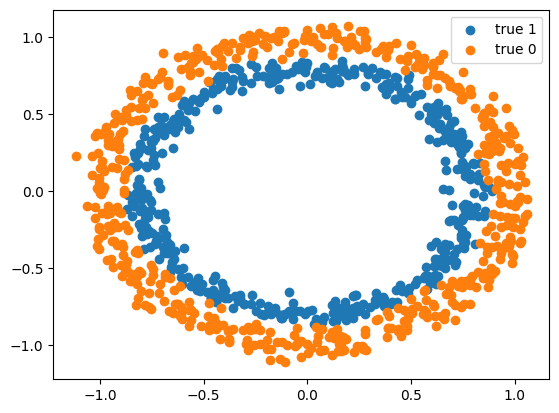

In [ ]:
import  matplotlib.pyplot as plt
y_pred = (model(X)>0.5).int().flatten()
x_1_0 = X[y_pred==1][:,0]
X_1_1 = X[y_pred==1][:,1]
x_0_0 = X[y_pred==0][:,0]
X_0_1 = X[y_pred==0][:,1]

plt.scatter(x_1_0, X_1_1, label='true 1')
plt.scatter(x_0_0, X_0_1, label='true 0')
plt.legend()
plt.show()

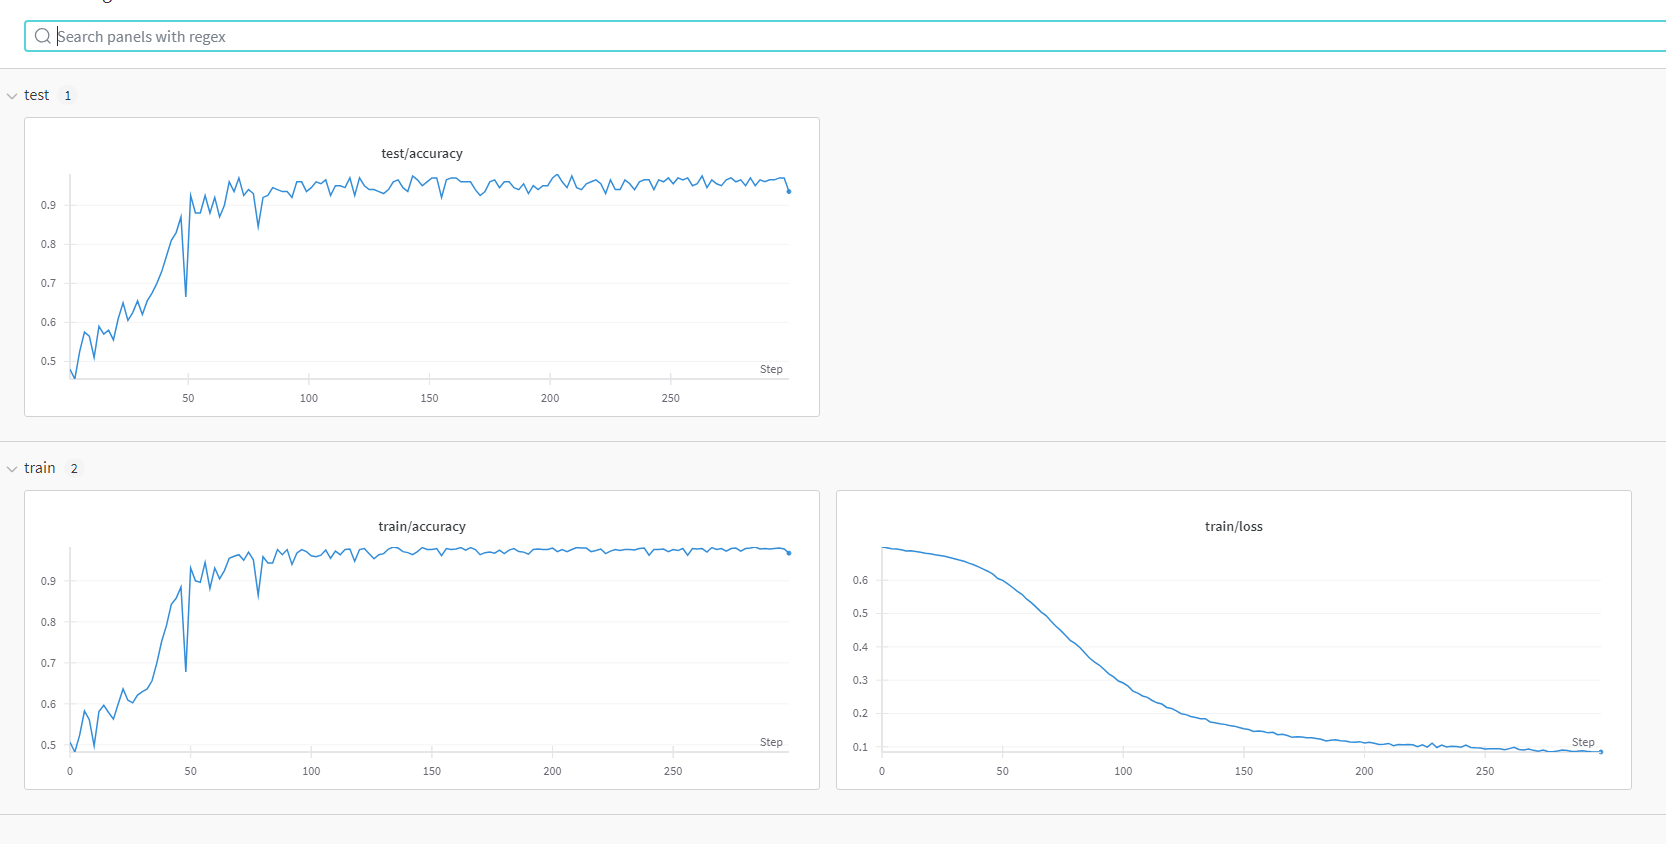

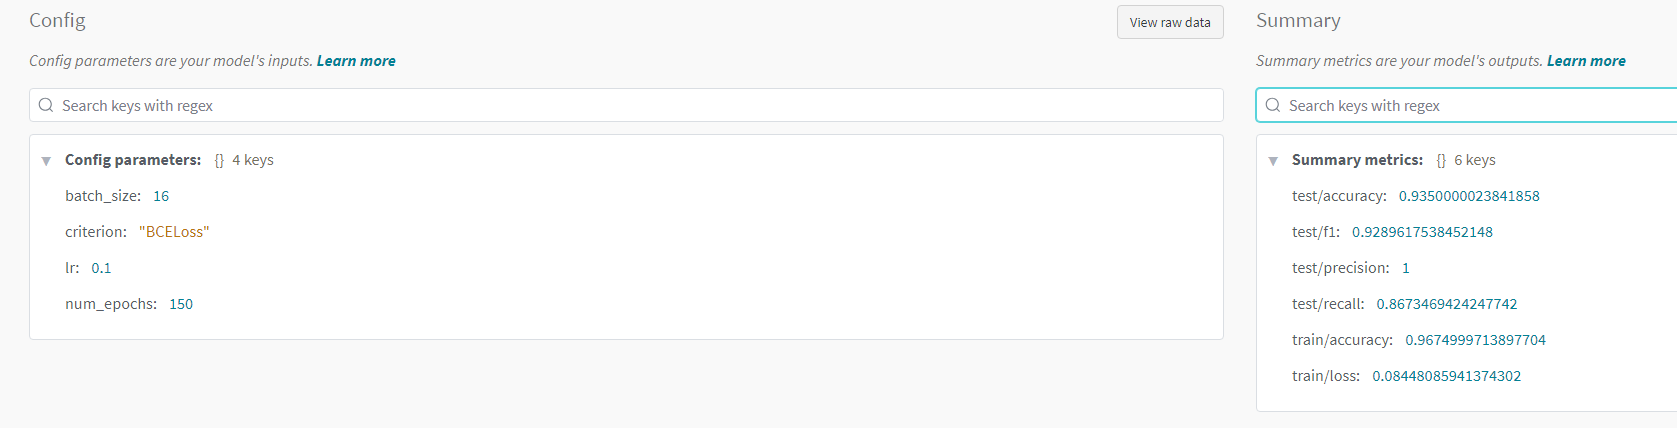

<p class="task" id="3"></p>

3\. Повторите задачу 2, вычислив и визуализировав матрицу несоответствий (для обучающей и тестовой выборки) тремя способами при помощи `wandb`:
* используя `torchmetrics` и представив данные в виде объекта `wandb.Table`;
* используя готовую функцию `wandb.plot.confusion_matrix`;
* построив тепловую карту при помощи `seaborn` и представив данные в виде объекта `wandb.Image`.

Вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс `wandb` со всеми нужными визуализациями.


- [ ] Проверено на семинаре

In [ ]:
import seaborn as sns
from torchmetrics.classification import ConfusionMatrix
import pandas as pd

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [ ]:
def train(num_epochs: int, criterion, model, lr=0.1):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0

        for x_batch, y_batch in loader:
            y_pred = model(x_batch).squeeze()
            loss = criterion(y_pred, y_batch.float())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()

        wandb.log({"train/loss": epoch_loss / len(loader)})

    return model

In [ ]:
criterion = nn.BCELoss()
train_dataset = TensorDataset(X_train, y_train)
loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

with wandb.init(
    project="Clas_Confusion_Matrix",
    config={"num_epochs": 50, "lr": 0.1, "batch_size": 16, "criterion": "BCELoss"},
):
    model = train(50, criterion, model)

model.eval()
with th.no_grad():
    y_train_pred = th.round(model(X_train).squeeze())  #==(model(X)>0.5).int().flatten()
    y_test_pred = th.round(model(X_test).squeeze())

train/loss,██████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
train/loss,0.31611


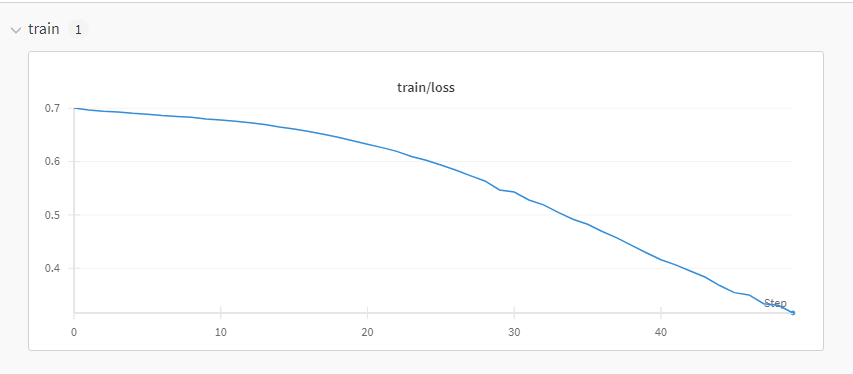

In [ ]:
# 1. Использование torchmetrics и wandb.Table
with wandb.init(
    project="Clas_Confusion_Matrix",
    config={"num_epochs": 50, "lr": 0.1, "batch_size": 16, "criterion": "BCELoss"},
):

    model.eval()
    cm = ConfusionMatrix(task='binary')
    train_cm = cm(y_train_pred, y_train)
    test_cm = cm(y_test_pred, y_test)

    columns = ['True_0', 'True_1']
    train_table = wandb.Table(columns=columns, data=train_cm.tolist())
    test_table = wandb.Table(columns=columns, data=test_cm.tolist())

    wandb.log({"Train Confusion Matrix (Table)": train_table})
    wandb.log({"Test Confusion Matrix (Table)": test_table})

![image.png](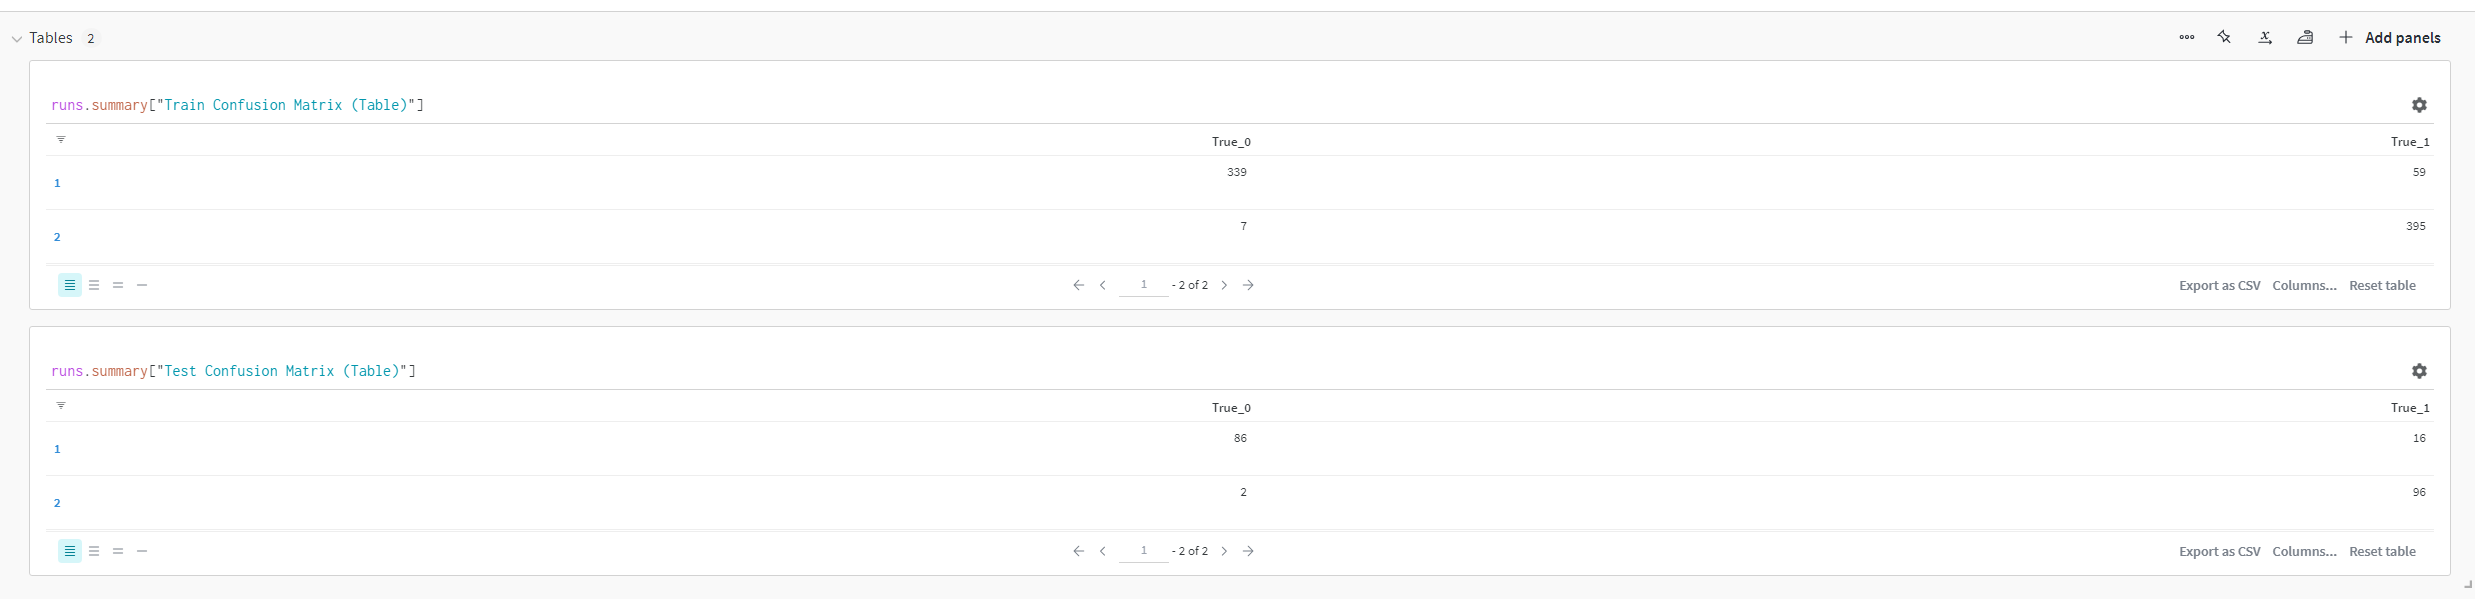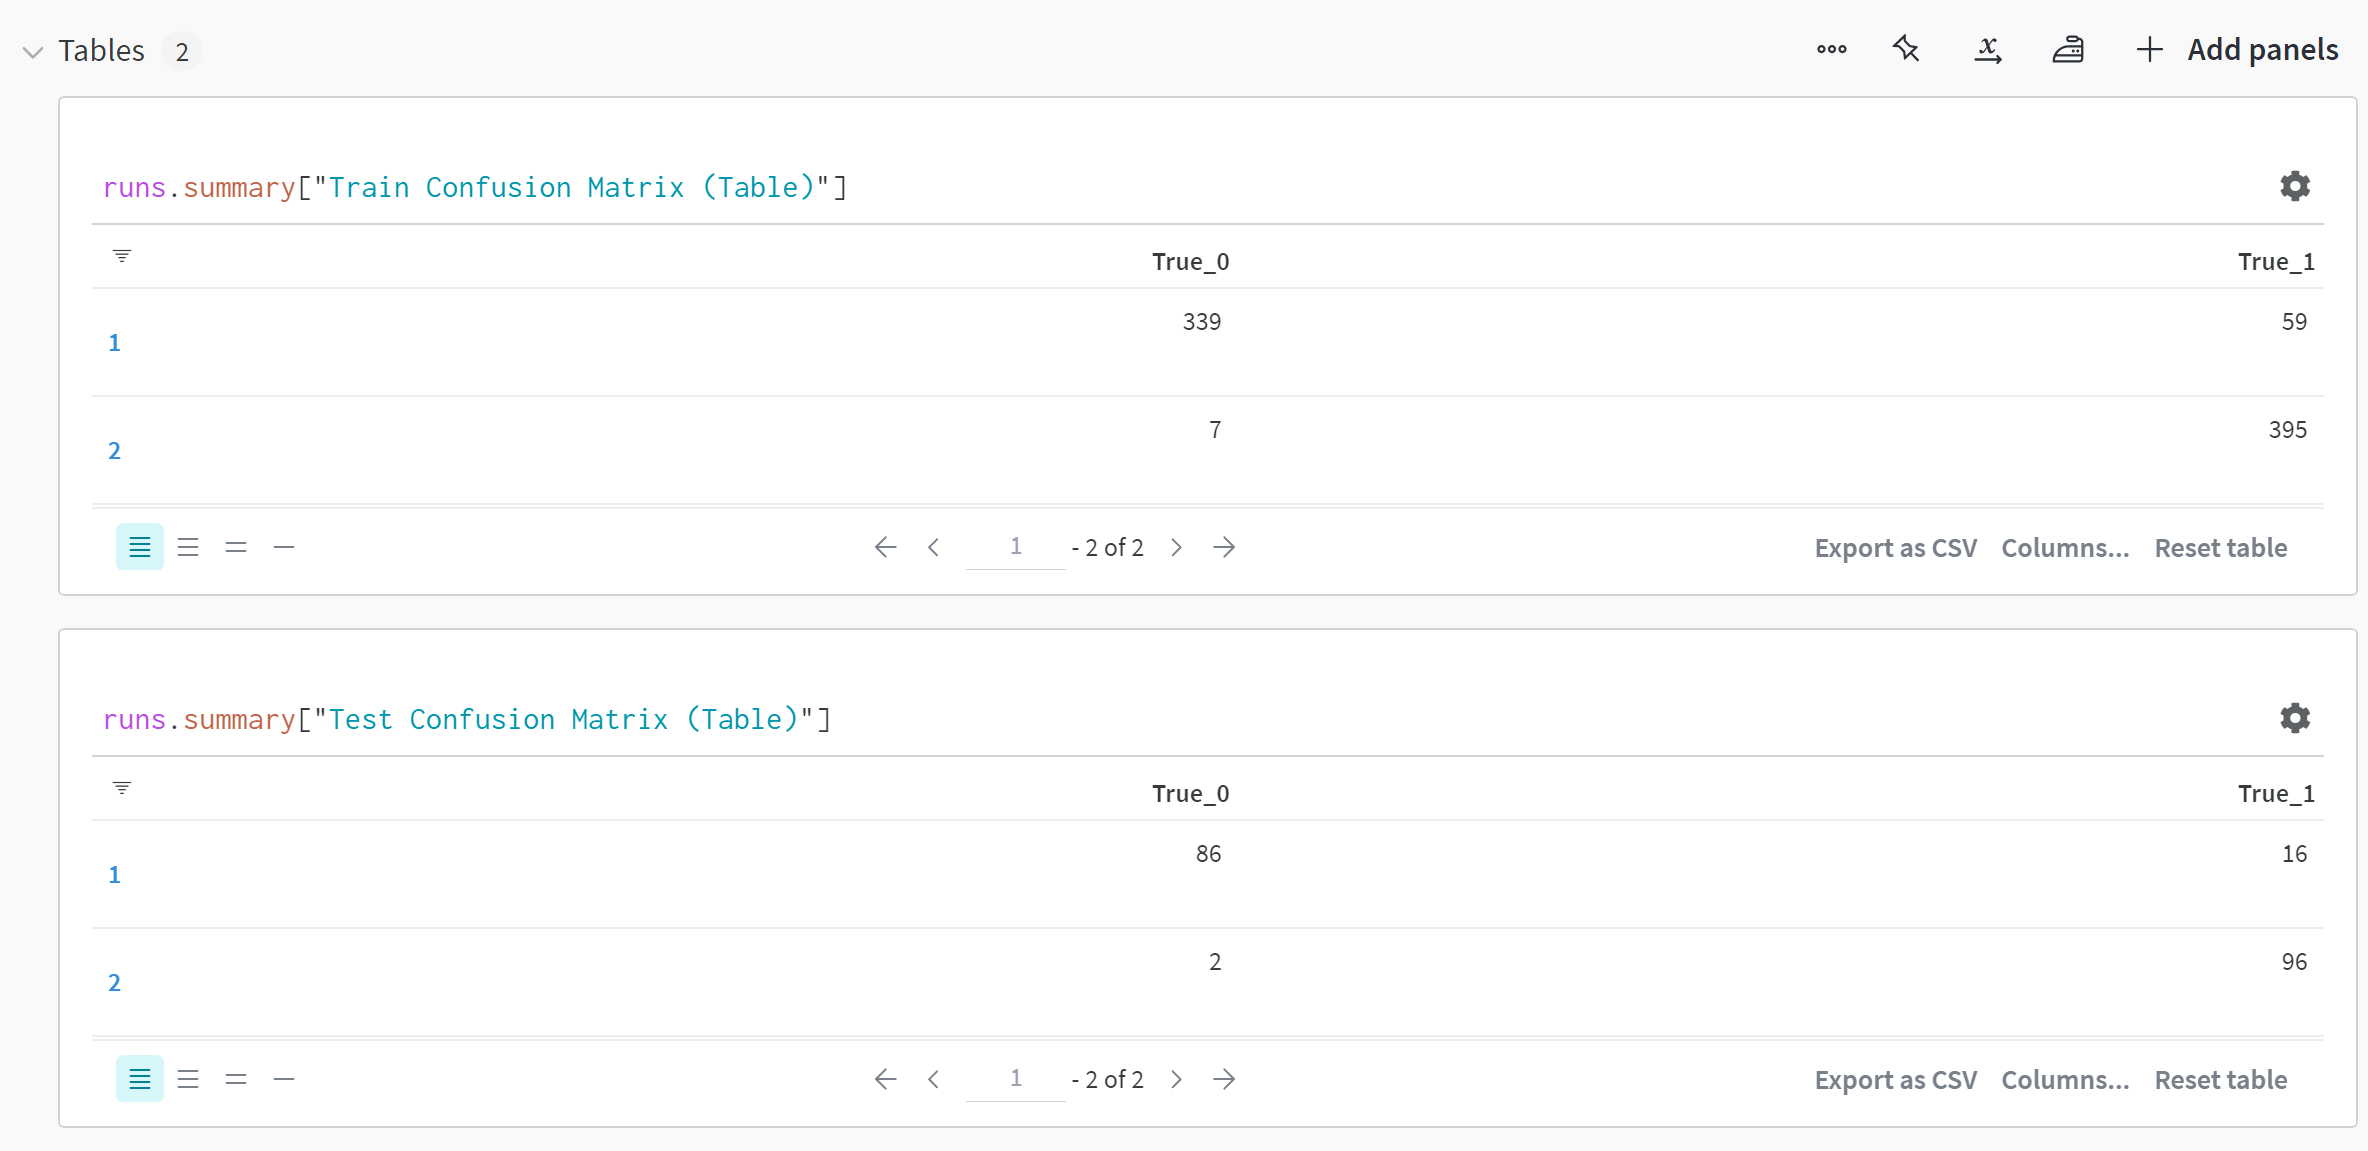)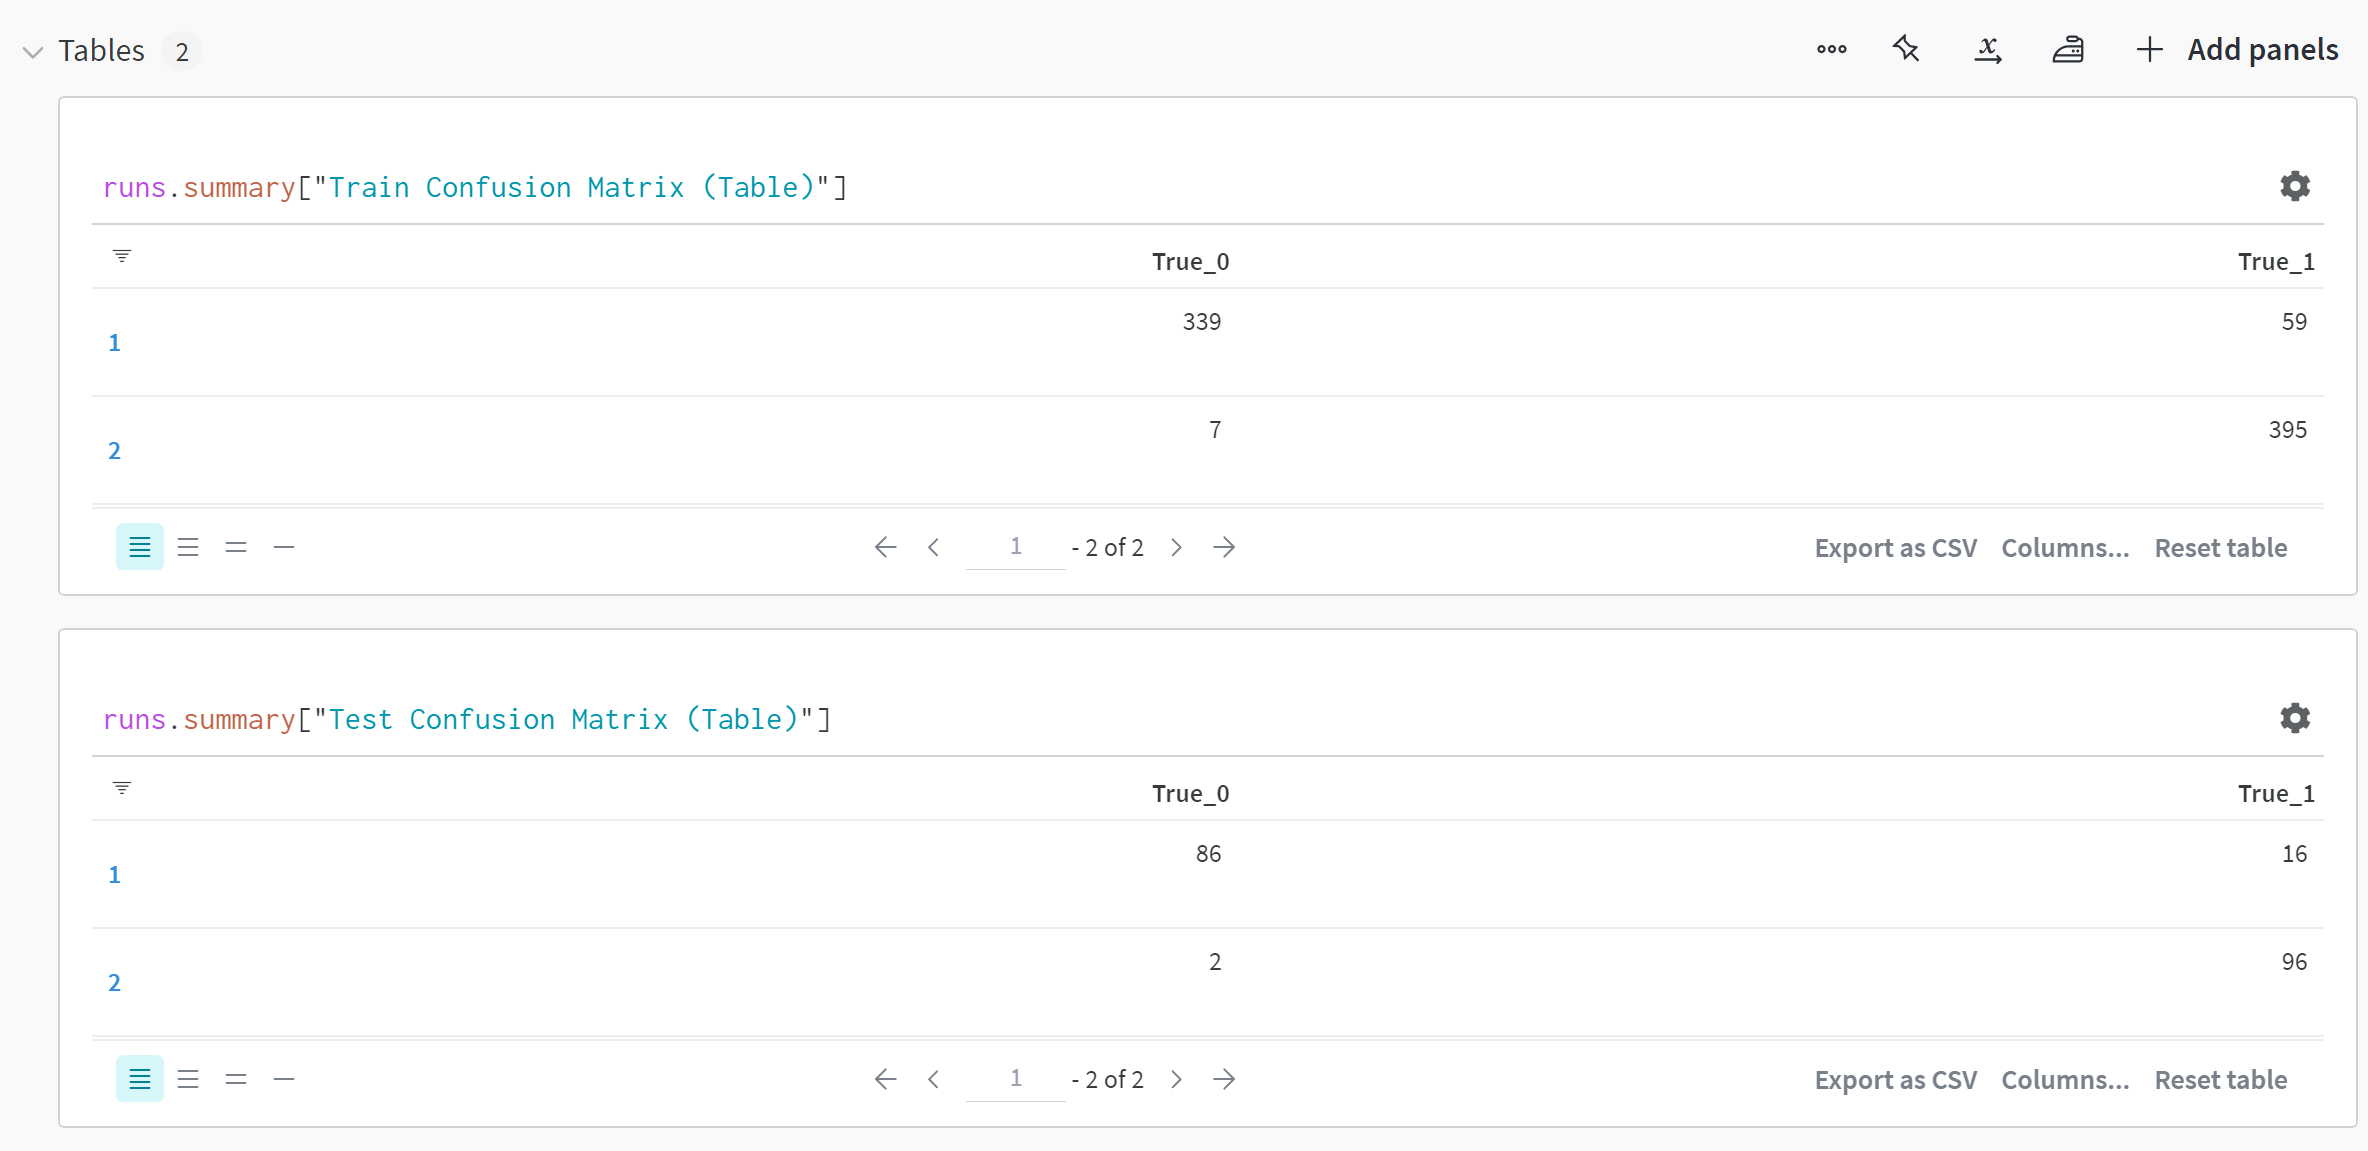

In [ ]:
# 2. Использование wandb.plot.confusion_matrix
# wandb запуск
with wandb.init(
    project="Clas_Confusion_Matrix",
    config={"num_epochs": 50, "lr": 0.1, "batch_size": 16, "criterion": "BCELoss"},
):

    model.eval()

    wandb.log({"Train Confusion Matrix (wandb.plot)": wandb.plot.confusion_matrix(probs=None,
                    y_true=y_train.numpy(),
                    preds=y_train_pred.numpy(),
                    class_names=["Class 0", "Class 1"])})

    wandb.log({"Test Confusion Matrix (wandb.plot)": wandb.plot.confusion_matrix(probs=None,
                    y_true=y_test.numpy(),
                    preds=y_test_pred.numpy(),
                    class_names=["Class 0", "Class 1"])})

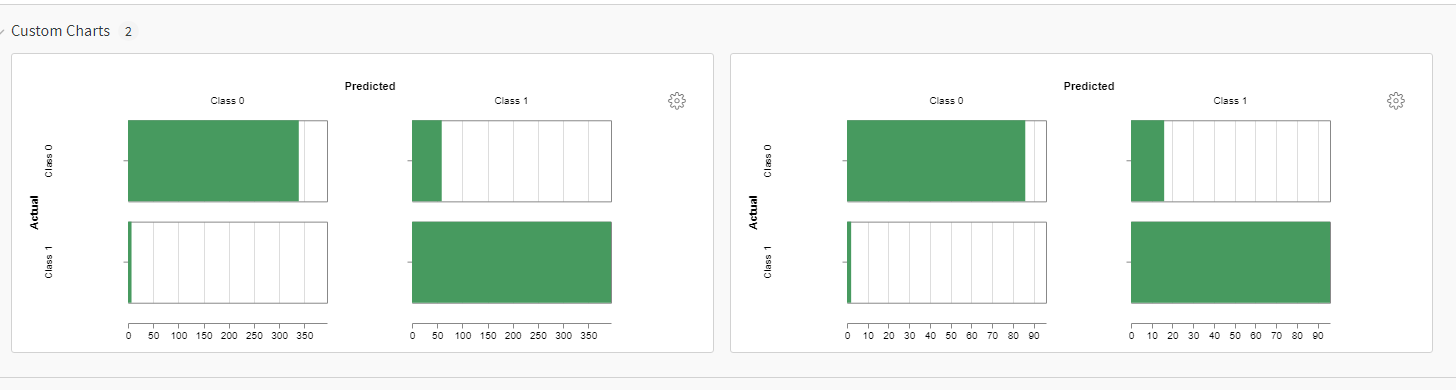
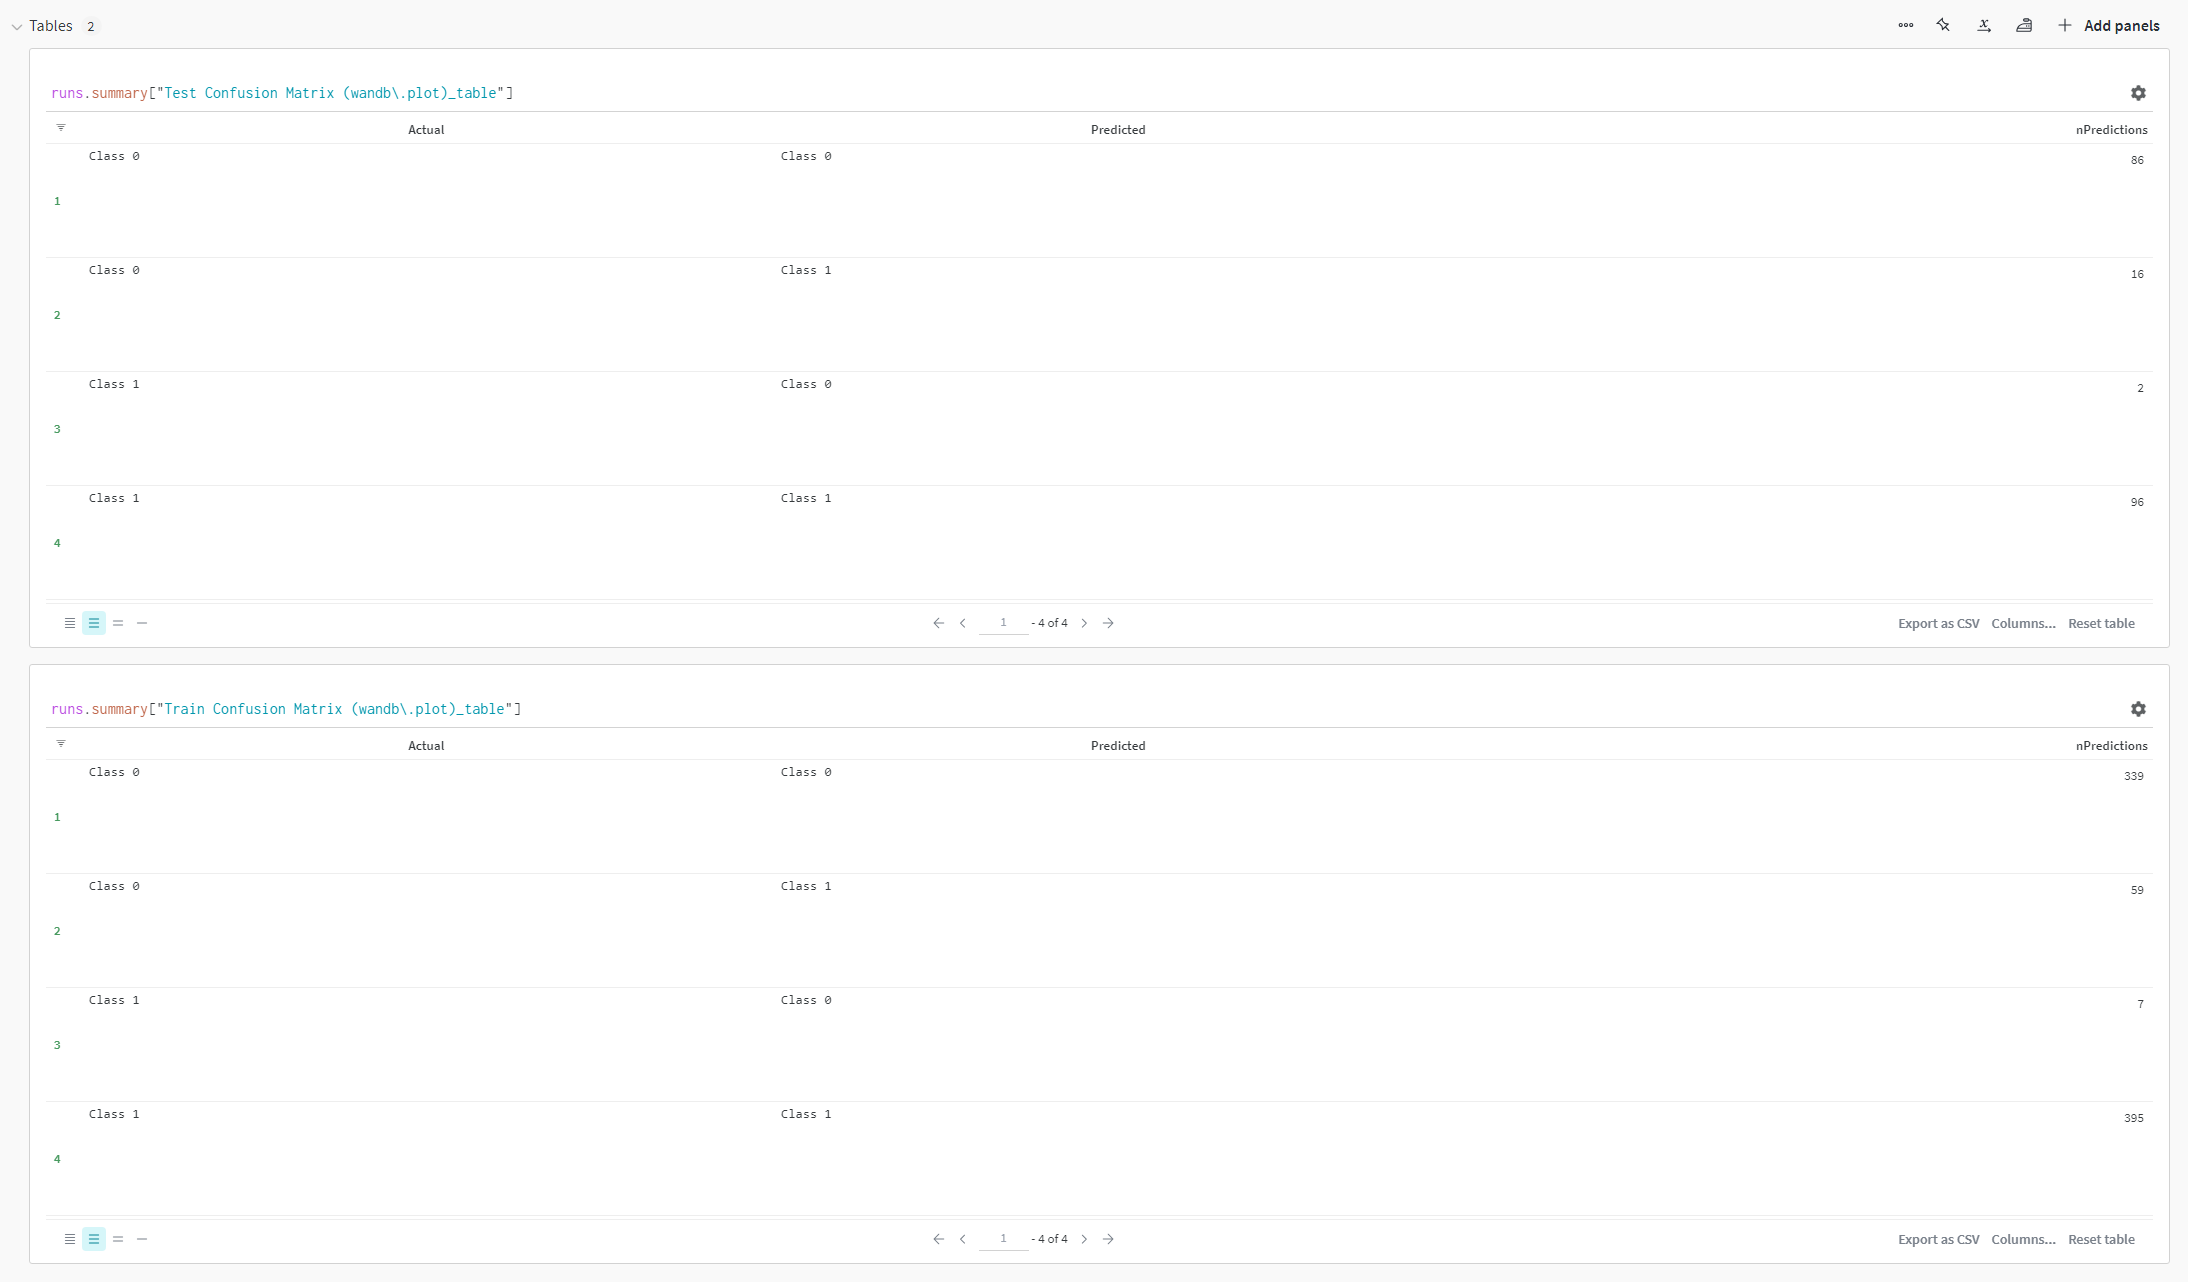

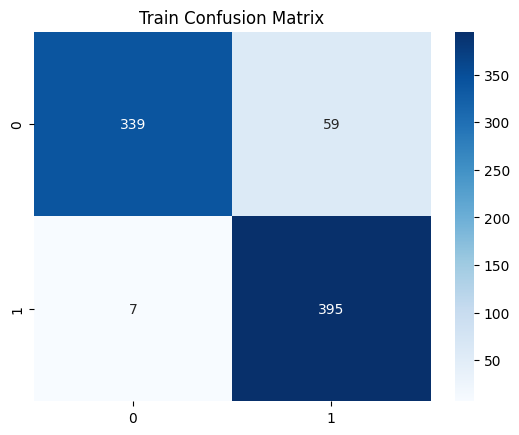

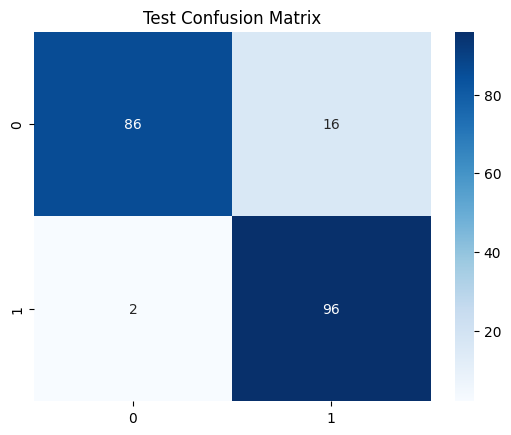

In [ ]:
# 3. Построение тепловой карты через seaborn
with wandb.init(
    project="Clas_Confusion_Matrix",
    config={"num_epochs": 50, "lr": 0.01, "batch_size": 16, "criterion": "BCELoss"},
):

    model.eval()

    fig_train, ax_train = plt.subplots()
    sns.heatmap(train_cm.numpy(), annot=True, fmt="d", cmap="Blues", ax=ax_train)
    ax_train.set_title('Train Confusion Matrix')
    wandb.log({"Train Confusion Matrix (seaborn)": wandb.Image(fig_train)})

    fig_test, ax_test = plt.subplots()
    sns.heatmap(test_cm.numpy(), annot=True, fmt="d", cmap="Blues", ax=ax_test)
    ax_test.set_title('Test Confusion Matrix')
    wandb.log({"Test Confusion Matrix (seaborn)": wandb.Image(fig_test)})

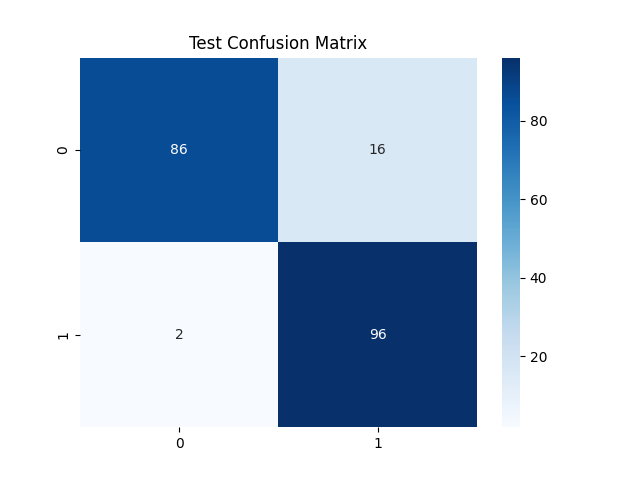

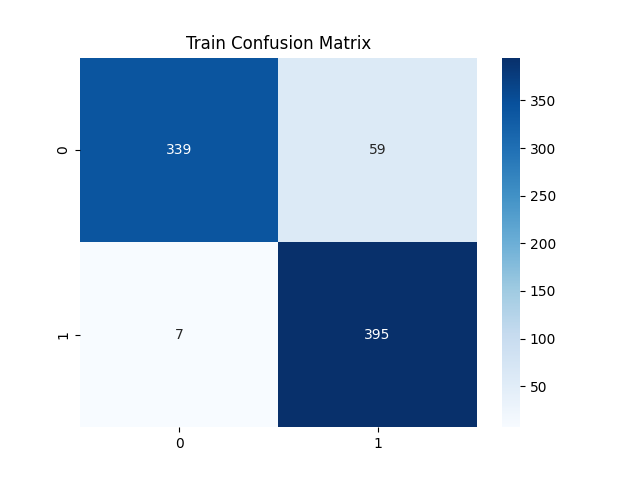

<p class="task" id="4"></p>

4\. Повторите задачу 2, обучив две модели: линейную и нелинейную. Для каждой из моделей сделайте прогноз (по всей выборке) и визуализируйте облако точек в виде `wandb.Image` (раскрасьте точки в цвета, соответствующие прогнозам модели).

Вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс `wandb` со всеми нужными визуализациями.


- [ ] Проверено на семинаре

In [ ]:
import torch as th
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

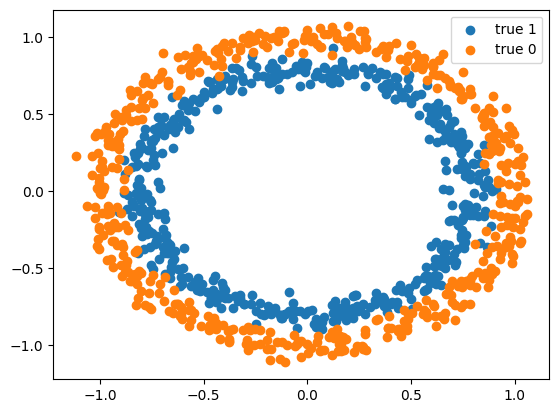

In [ ]:
import  matplotlib.pyplot as plt

x_1_0 = X[y==1][:,0]
X_1_1 = X[y==1][:,1]
x_0_0 = X[y==0][:,0]
X_0_1 = X[y==0][:,1]

plt.scatter(x_1_0, X_1_1, label='true 1')
plt.scatter(x_0_0, X_0_1, label='true 0')
plt.legend()
plt.show()

In [ ]:
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import wandb

model_linear = nn.Sequential(
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
)

model_notlinear = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
    nn.Sigmoid()
)

In [ ]:
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score
import  matplotlib.pyplot as plt

accuracy_metric = BinaryAccuracy()
precision_metric = BinaryPrecision()
recall_metric = BinaryRecall()
f1_metric = BinaryF1Score()

def compute_metrics_classif2(y_true, y_pred):
    acc = accuracy_metric(y_pred, y_true).item()
    prec = precision_metric(y_pred, y_true).item()
    rec = recall_metric(y_pred, y_true).item()
    f1 = f1_metric(y_pred, y_true).item()
    return acc, prec, rec, f1

def train(num_epochs: int, criterion, model, lr=0.01):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0

        for x_batch, y_batch in loader:
            y_pred = model(x_batch).squeeze()
            loss = criterion(y_pred, y_batch.float())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()

        y_pred_train = model(X_train).squeeze()
        train_acc = accuracy_metric(y_pred_train, y_train).item()
        wandb.log({"train/loss": epoch_loss / len(loader), "train/accuracy": train_acc})

        model.eval()
        with th.no_grad():
            y_pred_test = model(X_test).squeeze()
            test_acc = accuracy_metric(y_pred_test, y_test).item()
            wandb.log({"test/accuracy": test_acc})

    y_pred_test = model(X_test).squeeze()
    acc, prec, rec, f1 = compute_metrics_classif2(y_test, y_pred_test)

    wandb.run.summary["test/accuracy"] = acc
    wandb.run.summary["test/precision"] = prec
    wandb.run.summary["test/recall"] = rec
    wandb.run.summary["test/f1"] = f1

def plot_cloud(model):
    y_pred = (model(X) > 0.5).int().flatten()
    x_1_0 = X[y_pred == 1][:, 0]
    X_1_1 = X[y_pred == 1][:, 1]
    x_0_0 = X[y_pred == 0][:, 0]
    X_0_1 = X[y_pred == 0][:, 1]

    plt.scatter(x_1_0, X_1_1, label='predicted 1')
    plt.scatter(x_0_0, X_0_1, label='predicted 0')
    plt.legend()
    plt.title(model)
    PLOTIK = plt.gcf() #сохранение картинки
    plt.close()
    return PLOTIK

In [ ]:
criterion = nn.BCELoss()
train_dataset = TensorDataset(X_train, y_train)
loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

models = [model_linear, model_notlinear]
for model in models:
    with wandb.init(
        project="Homework",
        tags=["Classification2"],
        config={"num_epochs": 150, "lr": 0.1, "batch_size": 16, "criterion": "BCELoss"},
    ):
        train(150, criterion, model, lr=0.1)

with wandb.init(
        project="Homework",
        tags=["Classification2"],
        config={"num_epochs": 150, "lr": 0.1, "batch_size": 16, "criterion": "BCELoss"},
    ):
        plotik_1 = plot_cloud(model_linear)
        wandb.log({'model_linear': wandb.Image(plotik_1)})

        plotik_2 = plot_cloud(model_notlinear)
        wandb.log({'model_notlinear': wandb.Image(plotik_2)})

test/accuracy,▃▃▃▃▂▃▃▄▂▃▄▁▃▂▃▄▄▄▄▃▂▃▄▃▄█▃▂▂▂▃▃▂▅▃▂▃▁▂▃
train/accuracy,▄▄▂▄▃▁▃█▄▂▄▃▇▄▅▅▄▃▄▅▃▄▅▅▄█▇▇▅▃▃▄▂▂▄▅▅▄▆▄
train/loss,▅▄▅▂▄▁▅▂▄▄▃▃▃▇▅▆▅▃▁▃▆▃▂▅█▄▆▂▂▁▄▆▃▅▂▇▃▄▁▄
test/accuracy,0.46
test/f1,0.42553
test/precision,0.44444
test/recall,0.40816
train/accuracy,0.51
train/loss,0.69413


test/accuracy,▄▄▅▃▄▄▄▃▆▄▄▃▃▄▂▄▄▃▂▅▄▄▆▄▄▅▃█▅▂▇▃▆▄▄▄▄▁▄▇
train/accuracy,▅▁▅▆▅▃▇▇▆▅▁▆▅▅▃▇▅▄▇▆▆▅▇█▆▇▅▆▃▆▅▃█▆▇▆▇▆▆█
train/loss,█▇▇█▇█▄█▅▆▄▅▆▅▄▃▅▃▆▄▅▄▃▃▂▂▁▂▃▄▃▂▃▄▁▂▃▃▅▁
test/accuracy,0.97
test/f1,0.9697
test/precision,0.96
test/recall,0.97959
train/accuracy,0.96625
train/loss,0.07461


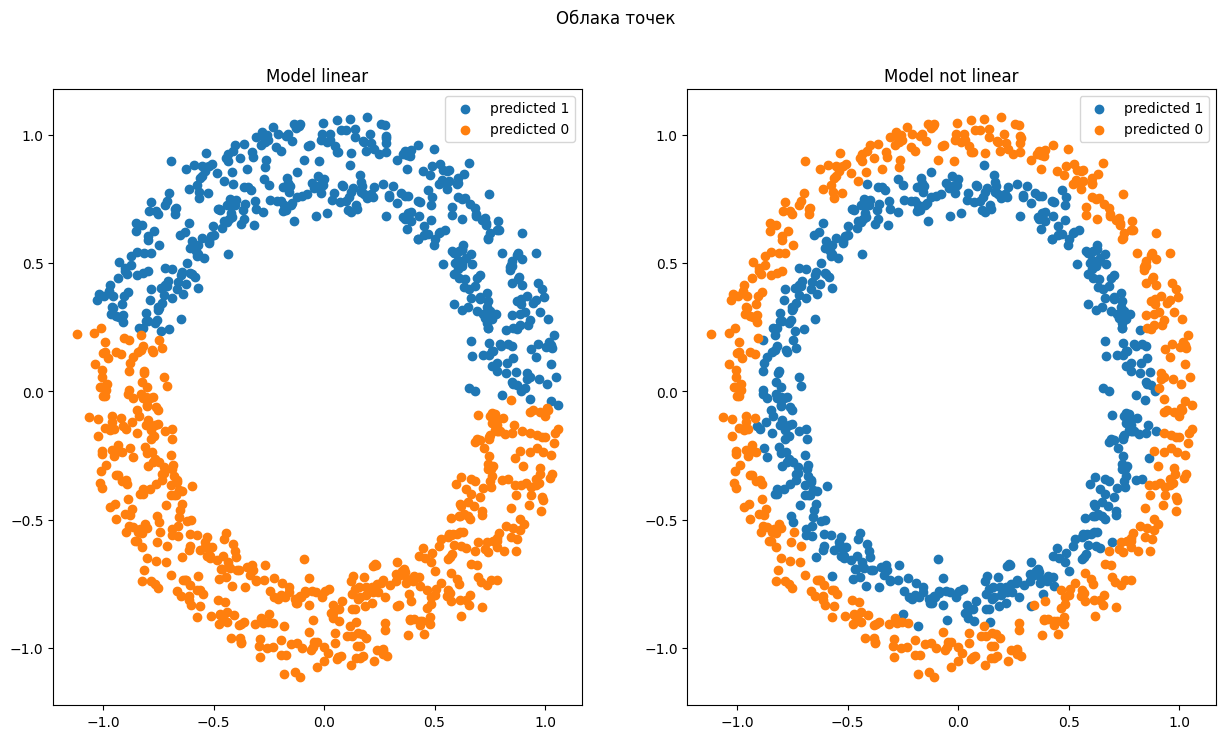

In [ ]:
import  matplotlib.pyplot as plt
plt.figure(figsize=[15, 8])

plt.suptitle('Облака точек')

plt.subplot(1, 2, 1)
y_pred = (model_linear(X) > 0.5).int().flatten()
x_1_0 = X[y_pred == 1][:, 0]
X_1_1 = X[y_pred == 1][:, 1]
x_0_0 = X[y_pred == 0][:, 0]
X_0_1 = X[y_pred == 0][:, 1]

plt.scatter(x_1_0, X_1_1, label='predicted 1')
plt.scatter(x_0_0, X_0_1, label='predicted 0')
plt.legend()
plt.title('Model linear')

plt.subplot(1, 2, 2)
y_pred = (model_notlinear(X) > 0.5).int().flatten()
x_1_0 = X[y_pred == 1][:, 0]
X_1_1 = X[y_pred == 1][:, 1]
x_0_0 = X[y_pred == 0][:, 0]
X_0_1 = X[y_pred == 0][:, 1]

plt.scatter(x_1_0, X_1_1, label='predicted 1')
plt.scatter(x_0_0, X_0_1, label='predicted 0')
plt.legend()
plt.title('Model not linear')

plt.show()

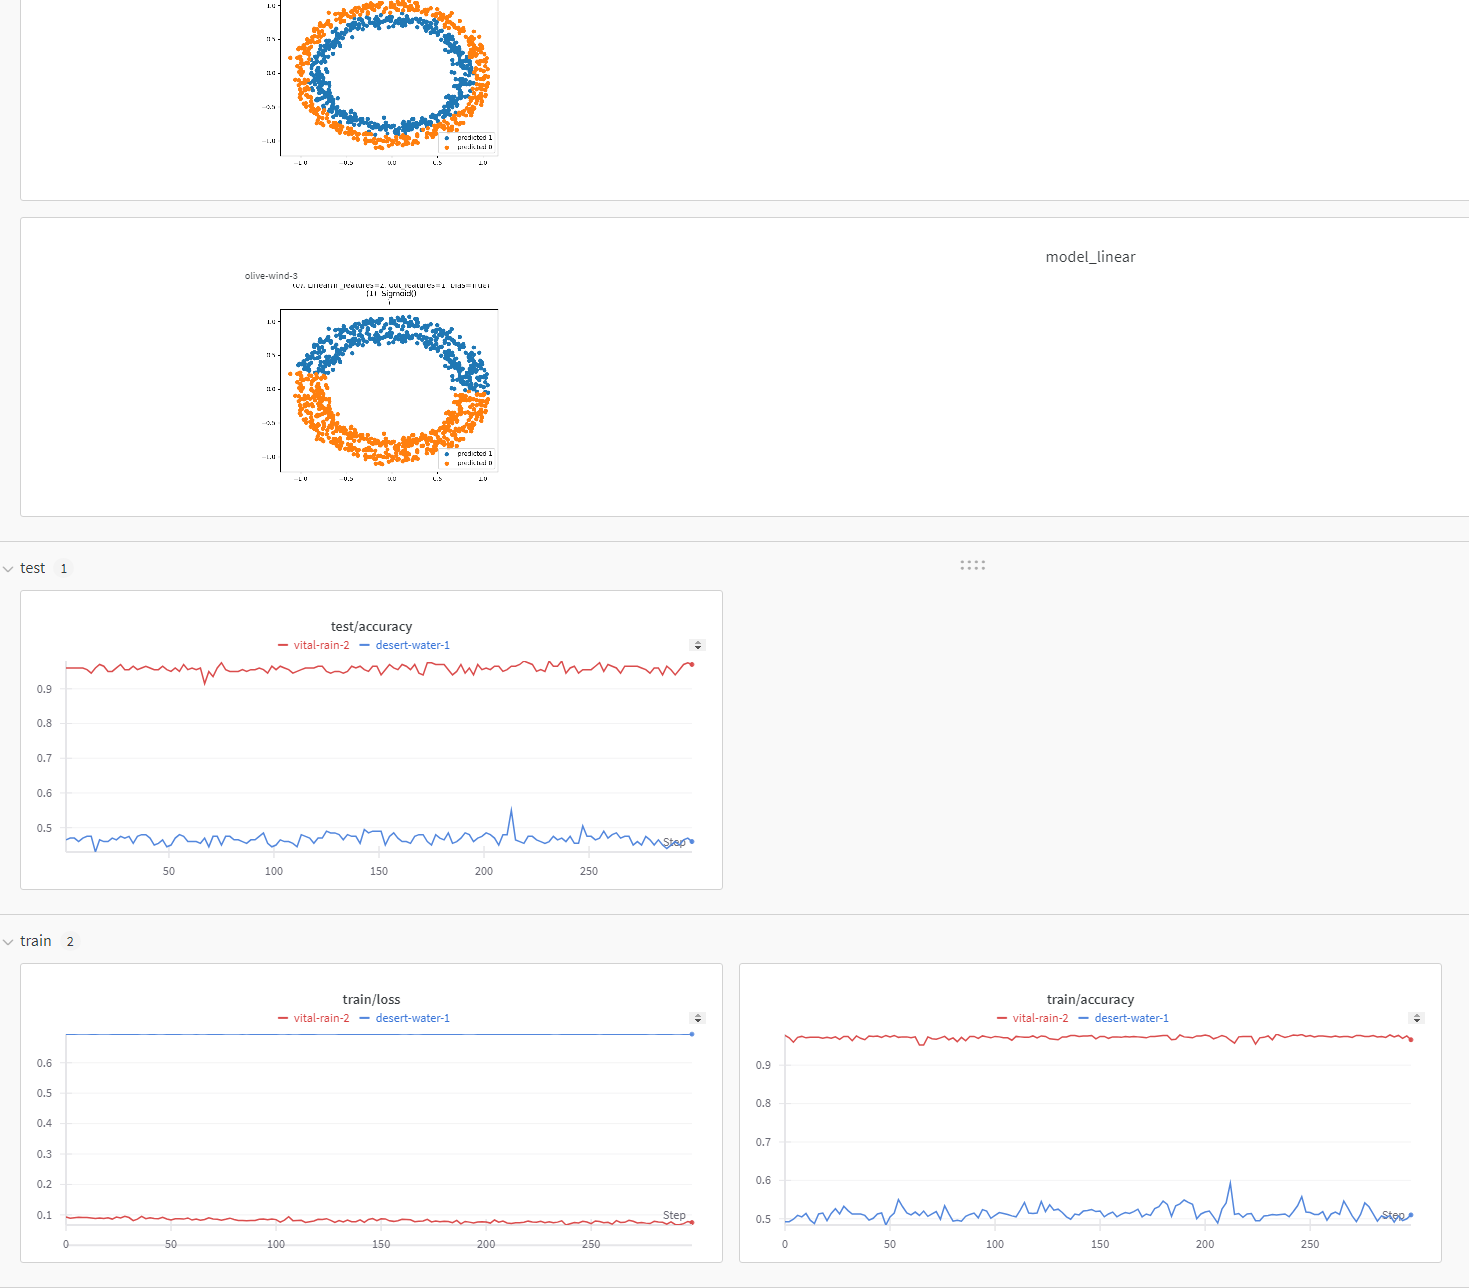

<p class="task" id="5"></p>

5\. Повторите задачу 2, реализовав логику ранней остановки. Для этого разделите данные на три части: обучающую, валидационную и тестовую. Остановите процесс обучения, если целевая метрика (F1) на валидации не увеличивалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи. Сохраните номер эпохи, на которой процесс обучения был прерван, в виде summary данного запуска.

Помимо отслеживания метрик на обучающей и тестовой выборке, также отслеживайте метрики на валидационной выборке в процессе обучения.

Постройте таблицу `wandb.Table`, в которой содержится информация о:
* признаках объекта;
* правильном ответе;
* прогнозе модели;
* принадлежности к обучающему, валидационному или тестовому множеству.

Визуализируйте данную таблицу при помощи `wandb`.

Вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс `wandb` со всеми нужными визуализациями.

- [ ] Проверено на семинаре


In [ ]:
import torch as th
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=52)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=52)

In [ ]:
accuracy_metric = BinaryAccuracy()
precision_metric = BinaryPrecision()
recall_metric = BinaryRecall()
f1_metric = BinaryF1Score()

def compute_metrics_classif(y_true, y_pred):
    acc = accuracy_metric(y_pred, y_true).item()
    prec = precision_metric(y_pred, y_true).item()
    rec = recall_metric(y_pred, y_true).item()
    f1 = f1_metric(y_pred, y_true).item()
    return acc, prec, rec, f1


def train_with_early_stopping(num_epochs: int, criterion, model, lr=0.01, k=10):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()
    best_f1 = 0
    patience_counter = 0
    for epoch in range(num_epochs):
        epoch_loss = 0
        model.train()

        for x_batch, y_batch in loader:
            y_pred = model(x_batch).squeeze()
            loss = criterion(y_pred, y_batch.float())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()

        y_pred_train = (model(X_train).squeeze() > 0.5).int()
        train_acc, train_prec, train_rec, train_f1 = compute_metrics_classif(y_train, y_pred_train)
        wandb.log({"train/loss": epoch_loss / len(loader), "train/accuracy": train_acc, "train/f1": train_f1})

        # Оценка на валидационной выборке
        model.eval()
        with th.no_grad():
            y_pred_val = (model(X_val).squeeze() > 0.5).int()
            val_acc, val_prec, val_rec, val_f1 = compute_metrics_classif(y_val, y_pred_val)
            wandb.log({"val/accuracy": val_acc, "val/f1": val_f1})

        # Логика ранней остановки
        if val_f1 > best_f1:
            best_f1 = val_f1
            patience_counter = 0  # Сброс счетчика ожидания
        else:
            patience_counter += 1

        if patience_counter >= k:
            print(f"Early stopping on epoch {epoch+1}")
            wandb.run.summary["stopped_epoch"] = epoch + 1
            break

    y_pred_test = (model(X_test).squeeze() > 0.5).int()
    test_acc, test_prec, test_rec, test_f1 = compute_metrics_classif(y_test, y_pred_test)

    wandb.run.summary["test/accuracy"] = test_acc
    wandb.run.summary["test/precision"] = test_prec
    wandb.run.summary["test/recall"] = test_rec
    wandb.run.summary["test/f1"] = test_f1

# таблица в wandb
def log_table():
    data = []
    sets = ['train'] * len(X_train) + ['val'] * len(X_val) + ['test'] * len(X_test)
    X_all = th.cat([X_train, X_val, X_test])
    y_all = th.cat([y_train, y_val, y_test])
    y_pred_all = (model(X_all).squeeze() > 0.5).int()

    for i, (x, y_true, y_pred, set_name) in enumerate(zip(X_all, y_all, y_pred_all, sets)):
        data.append([x[0].item(), x[1].item(), y_true.item(), y_pred.item(), set_name])

    table = wandb.Table(columns=["x1", "x2", "true_label", "pred_label", "dataset"], data=data)
    wandb.log({"Prediction Table": table})

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
    nn.Sigmoid()
)


criterion = nn.BCELoss()
train_dataset = TensorDataset(X_train, y_train)
loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

with wandb.init(
    project="Homework",
    tags=["Classification2", "EarlyStopping"],
    config={"num_epochs": 150, "lr": 0.01, "batch_size": 16, "criterion": "BCELoss", "patience": 10},
):
    train_with_early_stopping(150, criterion, model, lr=0.01, k=10)
    log_table()

Early stopping on epoch 12


train/accuracy,▁▅▅▄▄▄▄▄▆█▆▅
train/f1,▇█▇▆▆▅▄▄▄▄▂▁
train/loss,█▇▅▄▄▃▂▂▂▂▁▁
val/accuracy,▃█▆▄▃▃▂▁▃▆▃▁
val/f1,▇█▇▆▅▅▄▄▄▃▂▁
stopped_epoch,12
test/accuracy,0.51
test/f1,0.45556
test/precision,0.55405
test/recall,0.38679
train/accuracy,0.55


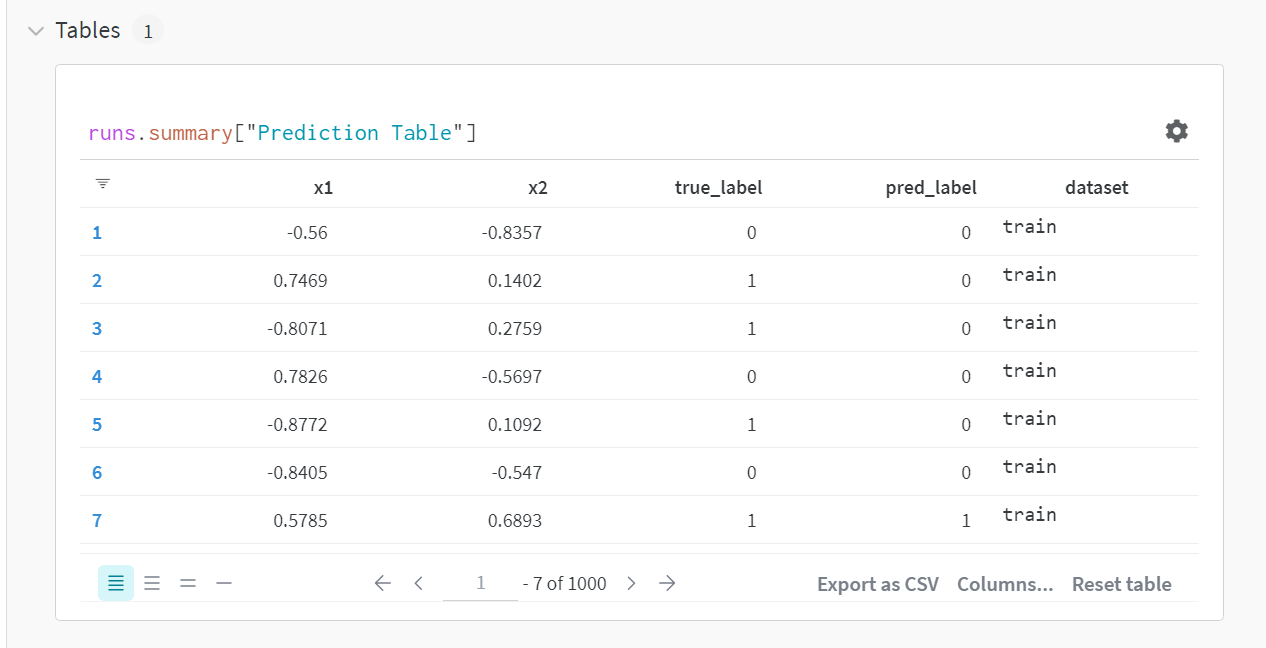

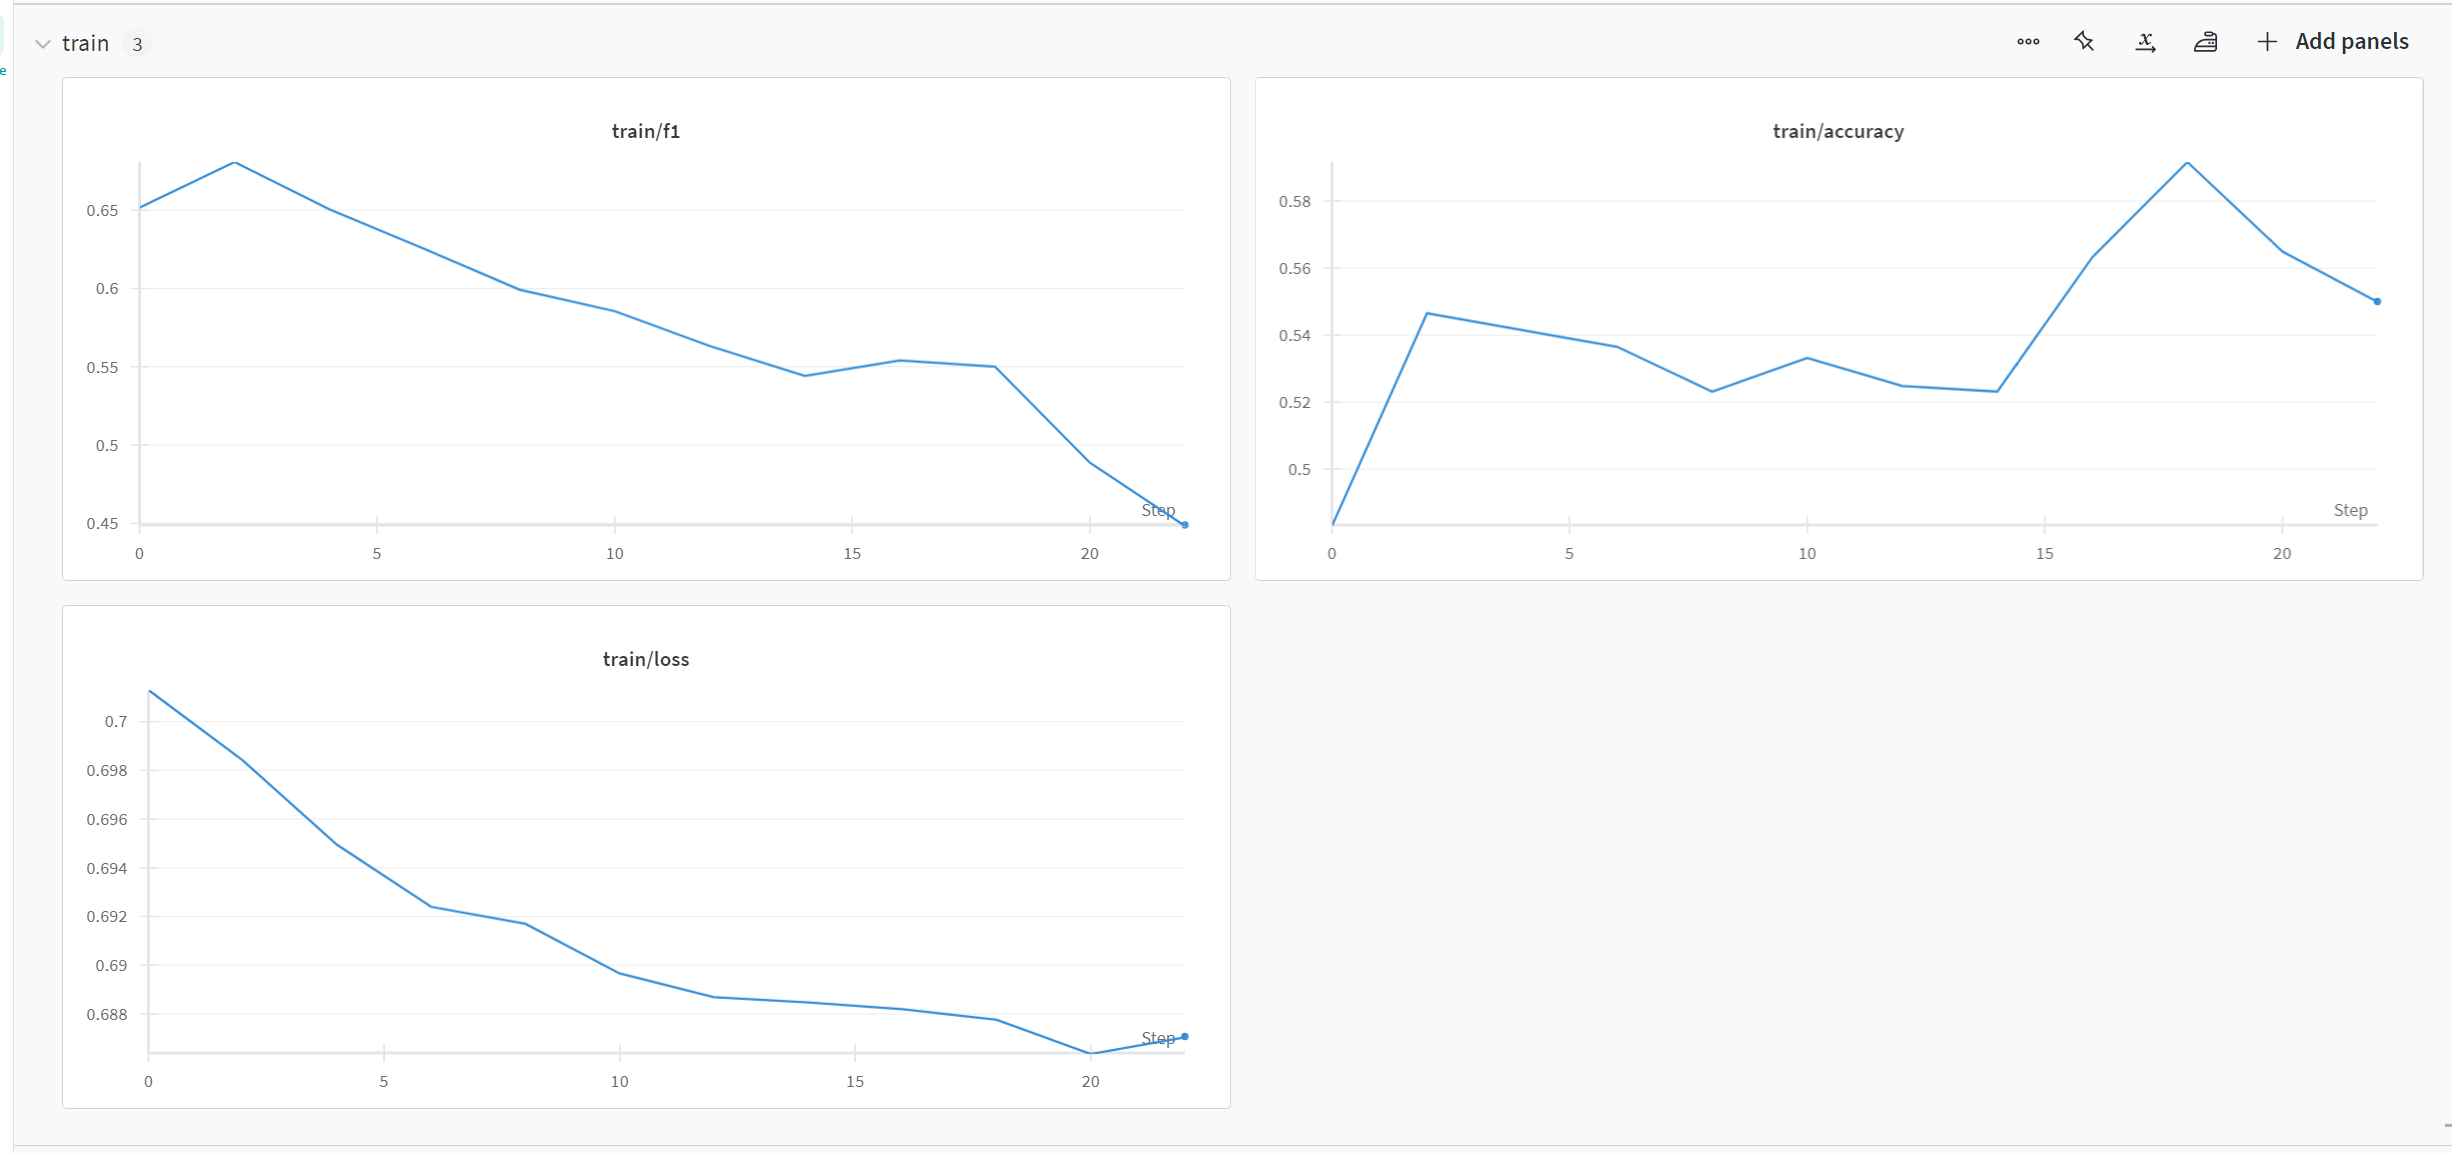

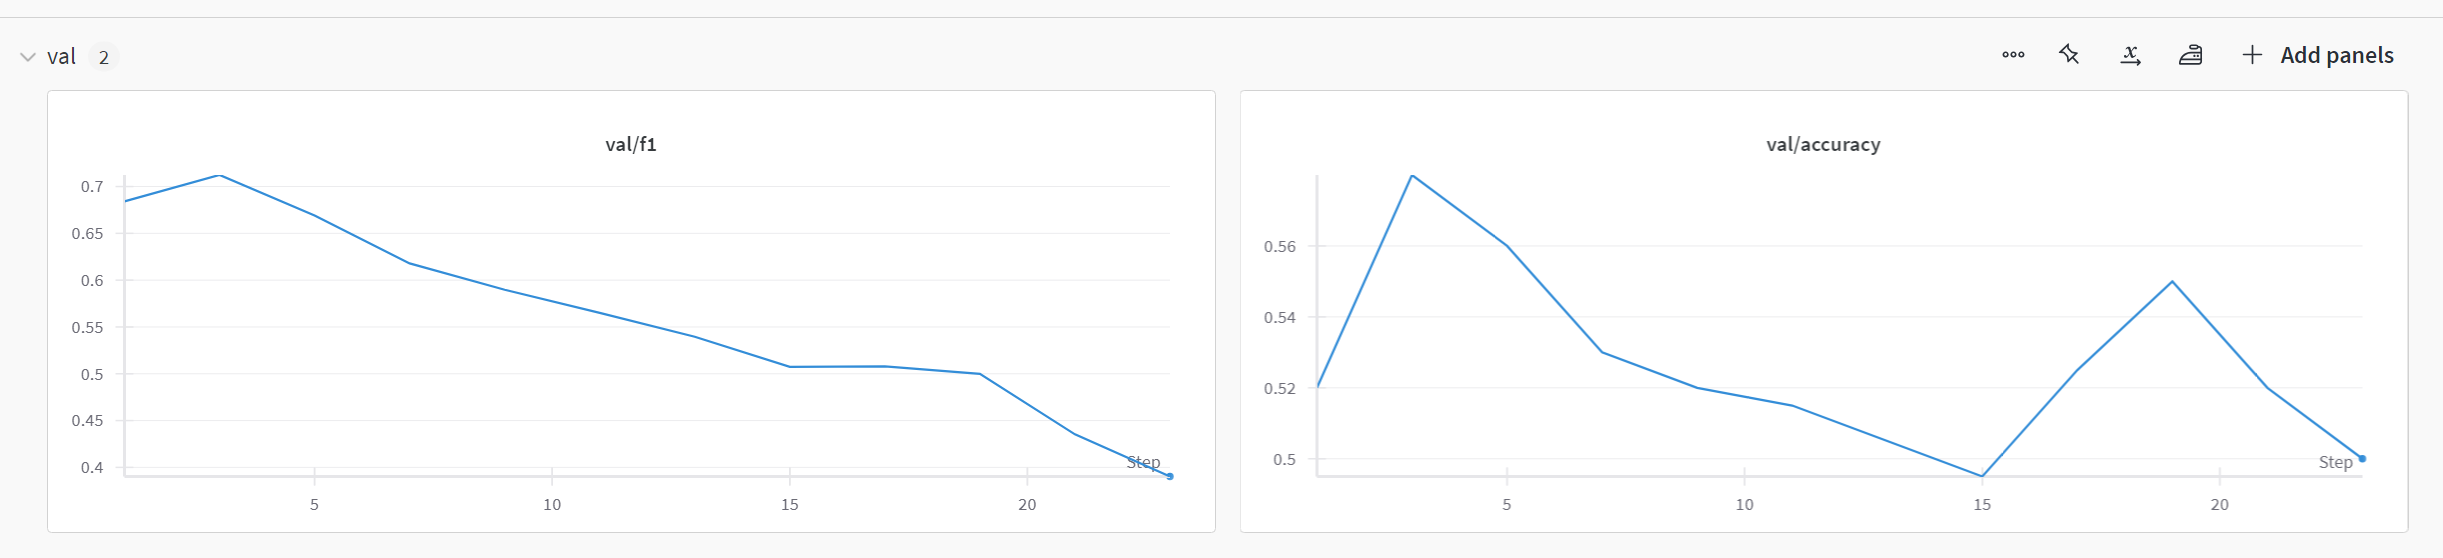

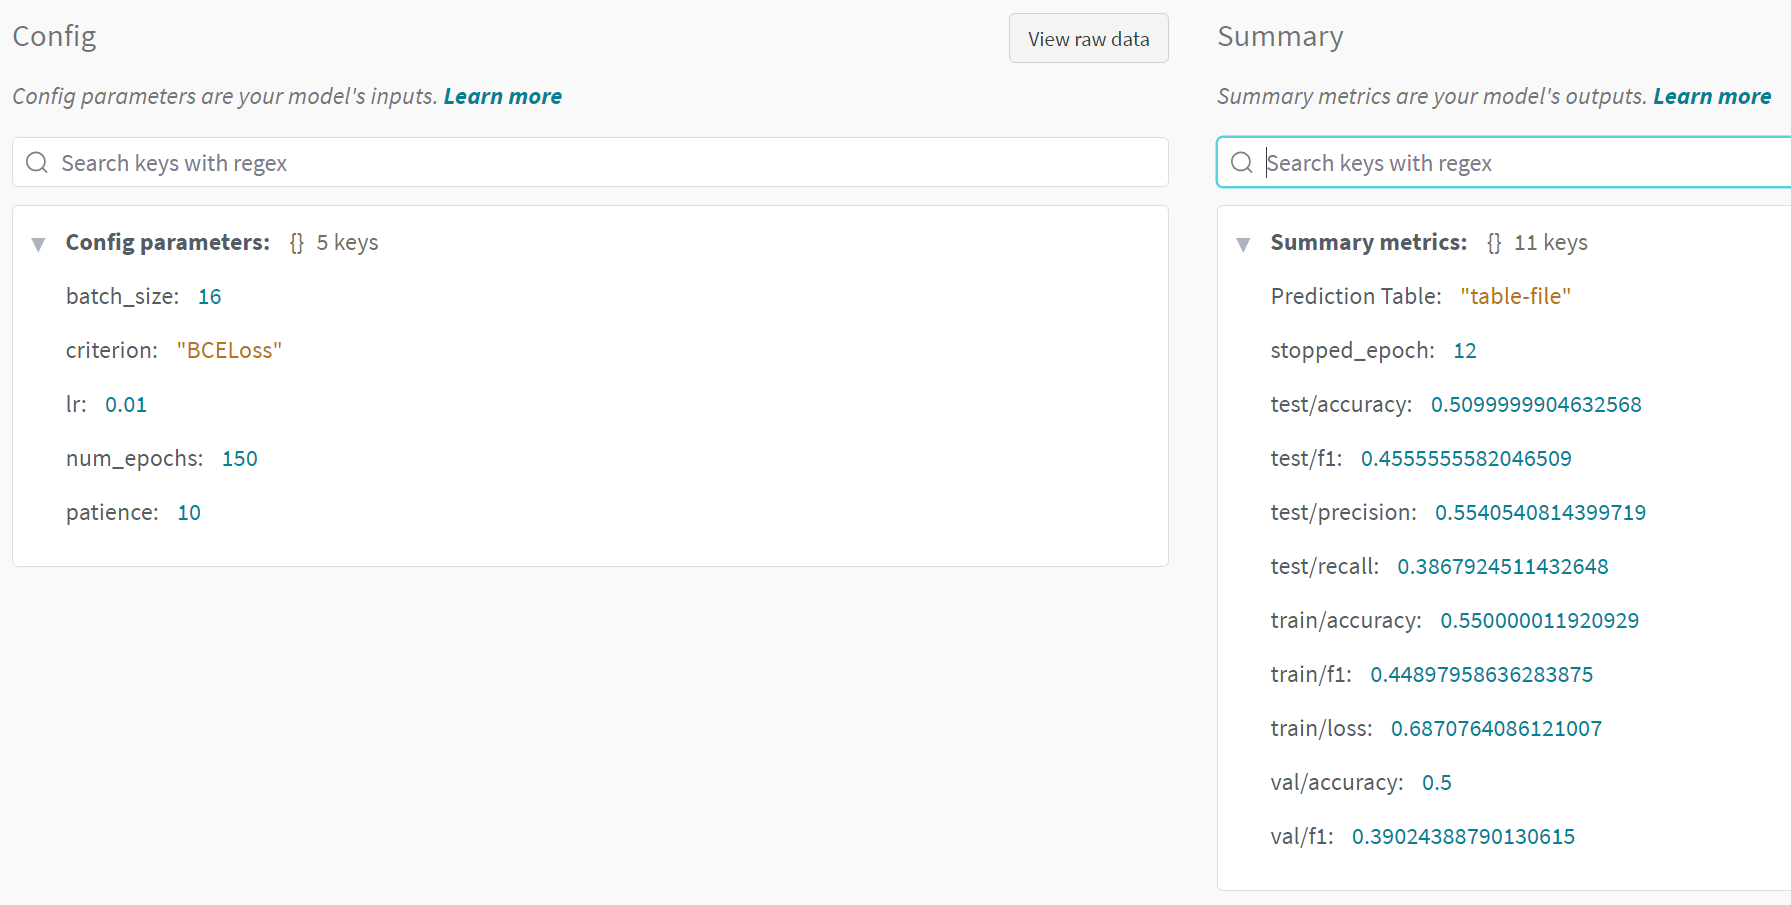